In [2]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm
#plt.style.use(mplhep.style.CMS)

In [3]:
#proton_selection = "SingleRP"
proton_selection = "MultiRP"

# Signal

In [7]:
# df_signal = None
# event_counts_signal = None
# selections_str_signal = None

#fileName_signal = "output/output-MC2017-Elastic-PreSel.h5"
#fileName_signal = "output/output-MC2017-Elastic-ExclSel.h5"
#fileName_signal = "output/output-MC2017-Elastic-Non3+3-PreSel.h5"
#fileName_signal = "output/output-MC2017-Elastic-Non3+3-PreSel-Pt1_30-Pt2_20.h5"
#fileName_signal = "output/output-MC2017-SingleDissociation-PreSel.h5"
#fileName_signal = "output/output-MC2017-SingleDissociation-ExclSel.h5"
#fileName_signal = "output/output-MC2017-SingleDissociation-Non3+3-PreSel.h5"
#fileName_signal = "output/output-MC2017-SingleDissociation-Non3+3-PreSel-Pt1_30-Pt2_20.h5"

# fileName_signal = "output-test-GGToMuMu_Pt-25_Elastic-PreSel-Pt1_30-Pt2_20.h5"

# labels_signals = [ "GGToMuMu_Pt-25_Elastic" ]
labels_signals = [ "GGToMuMu_Pt-25_Elastic", "GGToMuMu_Pt-25_Inel-El" ]
fileNames_signals = {
    'GGToMuMu_Pt-25_Elastic': [ 'output/output-test-GGToMuMu_Pt-25_Elastic-PreSel-Pt1_30-Pt2_20.h5' ],
    'GGToMuMu_Pt-25_Inel-El': [ 'output/output-test-GGToMuMu_Pt-25_Inel-El-PreSel-Pt1_30-Pt2_20.h5' ]
    }
# fileNames_signals = {
#     'GGToMuMu_Pt-25_Elastic': [ 'output/output-test-GGToMuMu_Pt-25_Elastic-mix_protons-PreSel-Pt1_30-Pt2_20.h5' ],
#     'GGToMuMu_Pt-25_Inel-El': [ 'output/output-test-GGToMuMu_Pt-25_Inel-El-mix_protons-PreSel-Pt1_30-Pt2_20.h5' ]
#     }

# with h5py.File( fileName_signal, 'r' ) as f:
#     print ( list(f.keys()) )
#     dset = f['protons_multiRP']
#     print ( dset.shape )
#     print ( dset[:,:] )
#     dset_columns = f['columns']
#     print ( dset_columns.shape )
#     columns = list( dset_columns )
#     print ( columns )
#     columns_str = [ item.decode("utf-8") for item in columns ]
#     print ( columns_str )
    
#     dset_counts = f['event_counts']
#     event_counts_signal = list( dset_counts )
#     print ( event_counts_signal )
    
#     dset_selections = f['selections']
#     selections_ = list( dset_selections )
#     print ( selections_ )
#     selections_str_signal = [ item.decode("utf-8") for item in selections_ ]
#     print ( selections_str_signal )
    
#     df_signal = pd.DataFrame( dset, columns=columns_str )
    
#     print ( df_signal )

from processing import get_data
# label_ = "GGToMuMu_Pt-25_Elastic"
label_ = "GGToMuMu_Pt-25_Inel-El"
df_counts, df_protons_multiRP, df_protons_singleRP = get_data( fileNames_signals[ label_ ], version='V2' )

output/output-test-GGToMuMu_Pt-25_Inel-El-PreSel-Pt1_30-Pt2_20.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(45867, 44)
[[1.0000000e+00 2.2200000e+02 4.2949673e+09 ... 9.5276255e-04
  2.9680653e-02 3.1525200e+05]
 [1.0000000e+00 2.2200000e+02 4.2949673e+09 ... 2.9354092e-02
  6.3378364e-03 3.2039400e+05]
 [1.0000000e+00 2.2200000e+02 4.2949673e+09 ... 3.9257640e-03
  4.5428168e-02 3.1699800e+05]
 ...
 [1.0000000e+00 4.1900000e+02 4.2949673e+09 ... 6.8905094e-04
  3.2193791e-02 3.2039400e+05]
 [1.0000000e+00 4.1900000e+02 4.2949673e+09 ... 2.7607545e-02
  1.8284128e-03 3.1525200e+05]
 [1.0000000e+00 4.1900000e+02 4.2949673e+09 ... 8.3056837e-04
  3.8267054e-02 3.1525200e+05]]
(93971, 44)
[[1.0000000e+00 2.2200000e+02 4.2949673e+09 ... 9.5276255e-04
  2.9680653e-02 3.1525200e+05]
 [1.0000000e+00 2.2200000e+02 4.2949673e+09 ... 9.5276255e-04
  2.9680653e-02 3.1525200e+05]
 [1.0000000e+00 2.2200000e+02 4.2949673e+09 ... 2.9354092e-02
  6.3378364e-03 3

In [8]:
# df_counts_signal = pd.Series( event_counts_signal, index=selections_str_signal);
# df_counts_signal
df_counts

All                   442350
Muon                  340920
Vertex                304204
Protons_check_none    304204
Protons                45503
dtype: int64

In [9]:
# df_protons_singleRP.head(20)
df_protons_singleRP

,Run,LumiSection,BX,EventNum,Slice,CrossingAngle,MultiRP,Arm,RPId1,RPId2,...,Muon1Phi,Muon1VtxZ,nVertices,PrimVertexZ,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus,Run_mc
0,1,222,4.294967e+09,2026,0,152.0,0,-999,103,-1,...,1.997083,0.401345,36,0.398638,69.124680,6,0.008806,0.000953,0.029681,315252
1,1,222,4.294967e+09,2026,0,152.0,0,-999,123,-1,...,1.997083,0.401345,36,0.398638,69.124680,6,0.008806,0.000953,0.029681,315252
2,1,222,4.294967e+09,2049,0,152.0,0,-999,3,-1,...,2.376033,-7.647170,28,-7.646573,175.170105,4,0.199871,0.029354,0.006338,320394
3,1,222,4.294967e+09,2049,0,152.0,0,-999,23,-1,...,2.376033,-7.647170,28,-7.646573,175.170105,4,0.199871,0.029354,0.006338,320394
4,1,222,4.294967e+09,2059,0,152.0,0,-999,103,-1,...,3.037848,1.455616,30,1.454549,173.605225,17,0.001077,0.003926,0.045428,316998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93966,1,419,4.294967e+09,1982,0,152.0,0,-999,123,-1,...,-2.891858,-3.803744,24,-3.807169,61.200928,2,0.000916,0.000689,0.032194,320394
93967,1,419,4.294967e+09,1995,0,152.0,0,-999,3,-1,...,0.721544,-2.118824,28,-2.099419,74.308640,2,0.352838,0.027608,0.001828,315252
93968,1,419,4.294967e+09,1995,0,152.0,0,-999,23,-1,...,0.721544,-2.118824,28,-2.099419,74.308640,2,0.352838,0.027608,0.001828,315252
93969,1,419,4.294967e+09,1986,0,152.0,0,-999,103,-1,...,0.502992,4.972908,24,4.961990,53.075024,0,0.474910,0.000831,0.038267,315252


In [10]:
df_protons_multiRP.columns

Index(['Run', 'LumiSection', 'BX', 'EventNum', 'Slice', 'CrossingAngle',
       'MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2',
       'TrackY2', 'Xi', 'T', 'ThX', 'ThY', 'Time', 'TrackThX_SingleRP',
       'TrackThY_SingleRP', 'Track1ThX_MultiRP', 'Track1ThY_MultiRP',
       'Track2ThX_MultiRP', 'Track2ThY_MultiRP', 'TrackPixShift_SingleRP',
       'Track1PixShift_MultiRP', 'Track2PixShift_MultiRP', 'Muon0Pt',
       'Muon0Eta', 'Muon0Phi', 'Muon0VtxZ', 'Muon1Pt', 'Muon1Eta', 'Muon1Phi',
       'Muon1VtxZ', 'nVertices', 'PrimVertexZ', 'InvMass', 'ExtraPfCands',
       'Acopl', 'XiMuMuPlus', 'XiMuMuMinus', 'Run_mc'],
      dtype='object')

In [11]:
# df_protons_multiRP.head(50)
df_protons_multiRP

,Run,LumiSection,BX,EventNum,Slice,CrossingAngle,MultiRP,Arm,RPId1,RPId2,...,Muon1Phi,Muon1VtxZ,nVertices,PrimVertexZ,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus,Run_mc
0,1,222,4.294967e+09,2026,0,152.0,1,1,103,123,...,1.997083,0.401345,36,0.398638,69.124680,6,0.008806,0.000953,0.029681,315252
1,1,222,4.294967e+09,2049,0,152.0,1,0,3,23,...,2.376033,-7.647170,28,-7.646573,175.170105,4,0.199871,0.029354,0.006338,320394
2,1,222,4.294967e+09,2059,0,152.0,1,1,103,123,...,3.037848,1.455616,30,1.454549,173.605225,17,0.001077,0.003926,0.045428,316998
3,1,222,4.294967e+09,2075,0,152.0,1,0,3,23,...,-1.379938,-0.850660,14,-0.857574,53.869602,4,0.616604,0.055922,0.000984,315252
4,1,222,4.294967e+09,2080,0,152.0,1,0,3,23,...,0.660121,-1.121097,25,-1.132355,236.998138,5,0.002542,0.014941,0.022245,323363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45862,1,419,4.294967e+09,1959,0,152.0,1,0,3,23,...,-1.484540,-6.634622,10,-6.630873,84.391800,0,0.049713,0.028213,0.001509,320394
45863,1,419,4.294967e+09,1985,0,152.0,1,0,3,23,...,0.331199,3.772856,21,3.779477,69.539635,0,0.001001,0.038783,0.000738,323363
45864,1,419,4.294967e+09,1982,0,152.0,1,1,103,123,...,-2.891858,-3.803744,24,-3.807169,61.200928,2,0.000916,0.000689,0.032194,320394
45865,1,419,4.294967e+09,1995,0,152.0,1,0,3,23,...,0.721544,-2.118824,28,-2.099419,74.308640,2,0.352838,0.027608,0.001828,315252


In [12]:
groupby_ = df_protons_multiRP.groupby( [ "Run", "LumiSection", "EventNum", "Slice" ] )

In [13]:
msk_ = groupby_[ 'Xi' ].transform( lambda s_: s_.size > 1 )
print ( msk_, np.sum(msk_) )

0        False
1        False
2        False
3        False
4        False
         ...  
45862    False
45863    False
45864    False
45865    False
45866    False
Name: Xi, Length: 45867, dtype: bool 728


In [14]:
df_protons_multiRP[ msk_ ]

,Run,LumiSection,BX,EventNum,Slice,CrossingAngle,MultiRP,Arm,RPId1,RPId2,...,Muon1Phi,Muon1VtxZ,nVertices,PrimVertexZ,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus,Run_mc
90,1,222,4.294967e+09,2927,0,152.0,1,0,3,23,...,2.420795,1.509874,10,1.509552,135.573898,4,0.005779,0.027158,0.004005,316998
91,1,222,4.294967e+09,2927,0,152.0,1,1,103,123,...,2.420795,1.509874,10,1.509552,135.573898,4,0.005779,0.027158,0.004005,316998
157,1,223,4.294967e+09,587,0,152.0,1,0,3,23,...,2.029987,-1.268004,34,-1.266193,99.388908,2,0.004895,0.037076,0.001577,316998
158,1,223,4.294967e+09,587,0,152.0,1,1,103,123,...,2.029987,-1.268004,34,-1.266193,99.388908,2,0.004895,0.037076,0.001577,316998
197,1,226,4.294967e+09,86,0,156.0,1,0,3,23,...,-1.153788,-2.473291,32,-2.459966,230.348251,14,0.000622,0.008785,0.035741,320394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45503,1,416,4.294967e+09,1287,0,148.0,1,1,103,123,...,-2.750417,-1.809799,20,-1.800354,175.238480,0,0.004305,0.030301,0.005997,316998
45808,1,419,4.294967e+09,1452,0,152.0,1,0,3,23,...,-2.278975,1.028039,30,1.028726,64.355789,8,0.004363,0.000750,0.032674,320394
45809,1,419,4.294967e+09,1452,0,152.0,1,1,103,123,...,-2.278975,1.028039,30,1.028726,64.355789,8,0.004363,0.000750,0.032674,320394
45858,1,419,4.294967e+09,1949,0,152.0,1,0,3,23,...,0.438798,2.001000,19,1.998092,81.498436,0,0.005834,0.031084,0.001265,315252


In [15]:
df_signal_events = df_protons_multiRP.set_index( ["Run", "LumiSection", "EventNum"] ).drop(
    columns=[
        'Xi', 'T', 'ThX', 'ThY', 'MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2', 'Time',
        'TrackThX_SingleRP', 'TrackThY_SingleRP', 'Track1ThX_MultiRP', 'Track1ThY_MultiRP', 'Track2ThX_MultiRP', 'Track2ThY_MultiRP',
        'TrackPixShift_SingleRP', 'Track1PixShift_MultiRP', 'Track2PixShift_MultiRP'
    ] )
df_signal_events = df_signal_events[ ~df_signal_events.index.duplicated(keep='first') ]
#msk_invmass = ( df_signal_events["InvMass"] >= 110. )
#df_signal_events = df_signal_events[msk_invmass]
df_signal_events

BX  Slice  CrossingAngle     Muon0Pt  \
Run LumiSection EventNum                                                   
1   222         2026      4.294967e+09      0          152.0   33.321381   
                2049      4.294967e+09      0          152.0   45.000481   
                2059      4.294967e+09      0          152.0   53.968376   
                2075      4.294967e+09      0          152.0   56.245159   
                2080      4.294967e+09      0          152.0  116.796165   
...                                ...    ...            ...         ...   
    419         1959      4.294967e+09      0          152.0   45.113285   
                1985      4.294967e+09      0          152.0   34.742977   
                1982      4.294967e+09      0          152.0   31.362558   
                1995      4.294967e+09      0          152.0   61.129265   
                1986      4.294967e+09      0          152.0   42.817501   

                          Muon0Eta  Muon0Phi  Muon0VtxZ     Muon1Pt  Muon1Eta  \
Run LumiSection EventNum                                                        
1   222         2026     -1.998834 -1.116844   0.395139   33.186413 -1.438944   
                2049     -0.536372 -0.137646  -7.647547   44.004887  2.088617   
                2059     -0.166826 -0.100360   1.453074   53.132927 -2.294024   
                2075      2.030774 -2.584413  -0.850360   40.173592  2.005233   
                2080     -0.377256 -2.473485  -1.131068  116.478790 -0.020302   
...                            ...       ...        ...         ...       ...   
    419         1959      1.445744  1.813230  -6.627672   39.693333  1.485129   
                1985      1.926741 -2.807250   3.785548   34.694279  2.035387   
                1982     -1.818767  0.246857  -3.808641   29.520525 -2.031870   
                1995      1.344161 -1.311575  -2.112335   31.217300  1.383087   
                1986     -1.888438 -1.146628   4.958452   30.435631 -1.952645   

                          Muon1Phi  Muon1VtxZ  nVertices  PrimVertexZ  \
Run LumiSection EventNum                                                
1   222         2026      1.997083   0.401345         36     0.398638   
                2049      2.376033  -7.647170         28    -7.646573   
                2059      3.037848   1.455616         30     1.454549   
                2075     -1.379938  -0.850660         14    -0.857574   
                2080      0.660121  -1.121097         25    -1.132355   
...                            ...        ...        ...          ...   
    419         1959     -1.484540  -6.634622         10    -6.630873   
                1985      0.331199   3.772856         21     3.779477   
                1982     -2.891858  -3.803744         24    -3.807169   
                1995      0.721544  -2.118824         28    -2.099419   
                1986      0.502992   4.972908         24     4.961990   

                             InvMass  ExtraPfCands     Acopl  XiMuMuPlus  \
Run LumiSection EventNum                                                   
1   222         2026       69.124680             6  0.008806    0.000953   
                2049      175.170105             4  0.199871    0.029354   
                2059      173.605225            17  0.001077    0.003926   
                2075       53.869602             4  0.616604    0.055922   
                2080      236.998138             5  0.002542    0.014941   
...                              ...           ...       ...         ...   
    419         1959       84.391800             0  0.049713    0.028213   
                1985       69.539635             0  0.001001    0.038783   
                1982       61.200928             2  0.000916    0.000689   
                1995       74.308640             2  0.352838    0.027608   
                1986       53.075024             0  0.474910    0.000831   

                          XiMuMuMinus  Run_mc  
Run Lu

(array([792., 953., 945., 938., 827., 775., 732., 752., 742., 615., 711.,
        680., 611., 558., 515., 548., 514., 385., 374., 411., 345., 438.,
        364., 354., 396., 322., 242., 259., 331., 330., 222., 233., 200.,
        299., 213., 234., 241., 230., 276., 213., 213., 186., 238., 203.,
        120., 181., 182., 140., 189., 227.]),
 array([0.    , 0.0002, 0.0004, 0.0006, 0.0008, 0.001 , 0.0012, 0.0014,
        0.0016, 0.0018, 0.002 , 0.0022, 0.0024, 0.0026, 0.0028, 0.003 ,
        0.0032, 0.0034, 0.0036, 0.0038, 0.004 , 0.0042, 0.0044, 0.0046,
        0.0048, 0.005 , 0.0052, 0.0054, 0.0056, 0.0058, 0.006 , 0.0062,
        0.0064, 0.0066, 0.0068, 0.007 , 0.0072, 0.0074, 0.0076, 0.0078,
        0.008 , 0.0082, 0.0084, 0.0086, 0.0088, 0.009 , 0.0092, 0.0094,
        0.0096, 0.0098, 0.01  ]),
 <BarContainer object of 50 artists>)

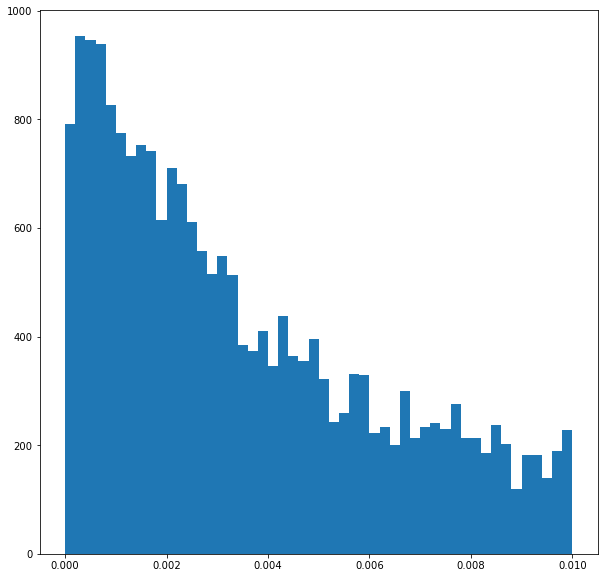

In [16]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_signal_events["Acopl"], bins=50, range=(0.,0.01) )
# plt.yscale( "log" )

(array([19770.,  9813.,  5241.,  2933.,  1796.,  1217.,   893.,   602.,
          478.,   349.,   251.,   205.,   168.,   132.,   133.,    98.,
           96.,    82.,    82.,   140.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <BarContainer object of 20 artists>)

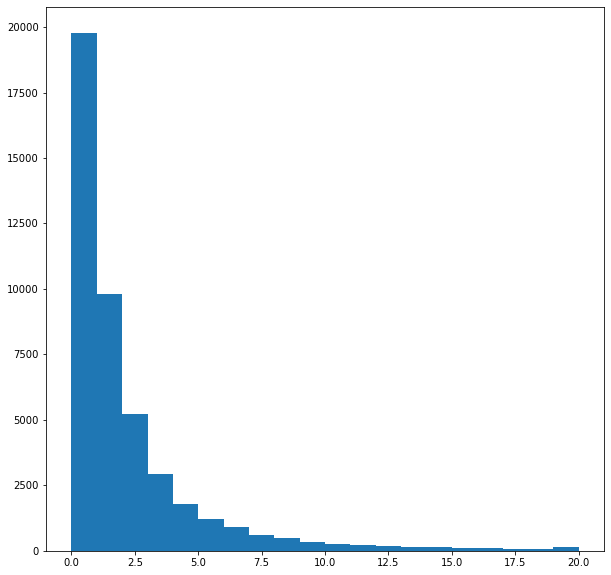

In [17]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_signal_events["ExtraPfCands"], bins=20, range=(0.,20) )
#plt.yscale( "log" )

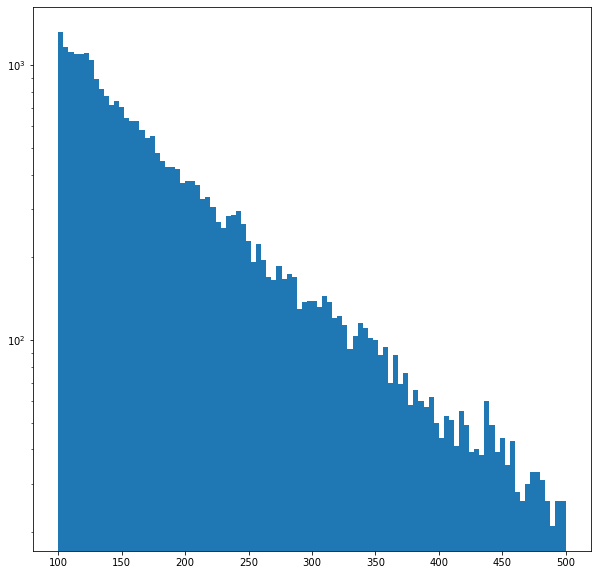

In [18]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_signal_events["InvMass"], bins=100, range=(100.,500) )
plt.yscale( "log" )

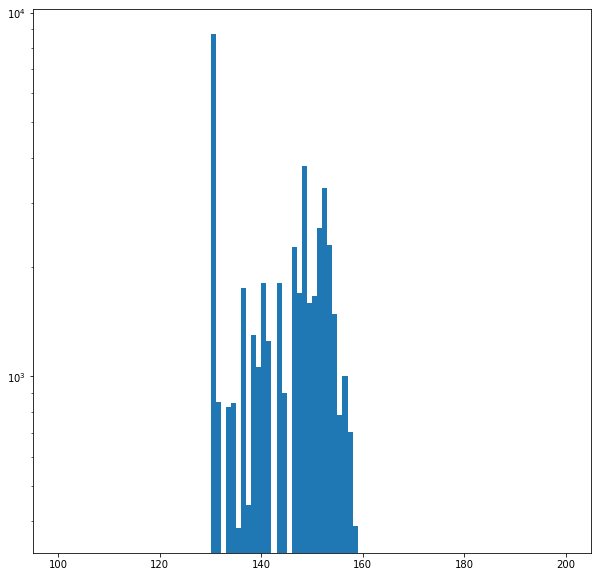

In [19]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_signal_events["CrossingAngle"], bins=100, range=(100.,200.) )
# plt.hist( df_signal_events["CrossingAngle_rnd"], bins=100, range=(100.,200.) )
plt.yscale( "log" )

2259 1736


Text(0, 0.5, 'Y (mm)')

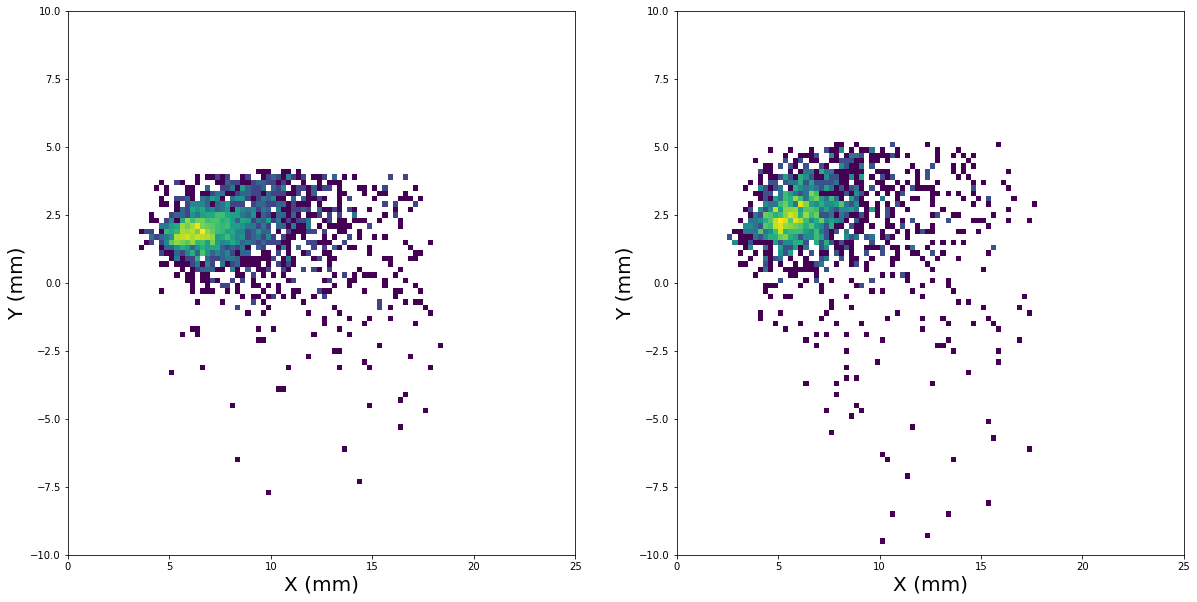

In [20]:
# msk_excl = ( df_signal["InvMass"] >= 110. ) & ( df_signal["Acopl"] <= 0.009 ) & ( df_signal["ExtraPfCands"] <= 1 )
# msk1 = None
# msk2 = None
# if proton_selection == "SingleRP":
#     # Single-RP in pixel stations
#     msk1 = msk_excl & ( df_signal["MultiRP"] == 0) & ( df_signal["RPId1"] == 23 )
#     msk2 = msk_excl & ( df_signal["MultiRP"] == 0) & ( df_signal["RPId1"] == 123 )
# elif proton_selection == "MultiRP":
#     # Multi-RP
#     msk1 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 0 )
#     msk2 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 1 )

df_signal = None
if proton_selection == "SingleRP": df_signal = df_protons_singleRP
elif proton_selection == "MultiRP": df_signal = df_protons_multiRP

msk_excl = ( df_signal["InvMass"] >= 110. ) & ( df_signal["Acopl"] <= 0.009 ) & ( df_signal["ExtraPfCands"] <= 1 )
msk1 = None
msk2 = None
if proton_selection == "SingleRP":
    # Single-RP in pixel stations
    msk1 = msk_excl & ( df_signal["MultiRP"] == 0) & ( df_signal["RPId1"] == 23 )
    msk2 = msk_excl & ( df_signal["MultiRP"] == 0) & ( df_signal["RPId1"] == 123 )
elif proton_selection == "MultiRP":
    # Multi-RP
    # msk1 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 0 )
    # msk2 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 1 )
    msk1 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 0 ) & ( df_signal.loc[ :, "Xi"] >= 0.050 )
    msk2 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 1 ) & ( df_signal.loc[ :, "Xi"] >= 0.060 )

print ( len(df_signal[ "Xi" ][ msk1 ]), len(df_signal[ "Xi" ][ msk2 ]) )

fig, axes = plt.subplots( 1, 2, figsize=(20,10) )
axes[0].hist2d( df_signal[ "TrackX1" ][ msk1 ], df_signal[ "TrackY1" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0].set_xlabel( "X (mm)", fontsize=20 )
axes[0].set_ylabel( "Y (mm)", fontsize=20 )
axes[1].hist2d( df_signal[ "TrackX1" ][ msk2 ], df_signal[ "TrackY1" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1].set_xlabel( "X (mm)", fontsize=20 )
axes[1].set_ylabel( "Y (mm)", fontsize=20 )

2259 1736


/tmp/ipykernel_476/3562875763.py:15: RuntimeWarning: invalid value encountered in divide
  axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
/tmp/ipykernel_476/3562875763.py:21: RuntimeWarning: invalid value encountered in divide
  axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )


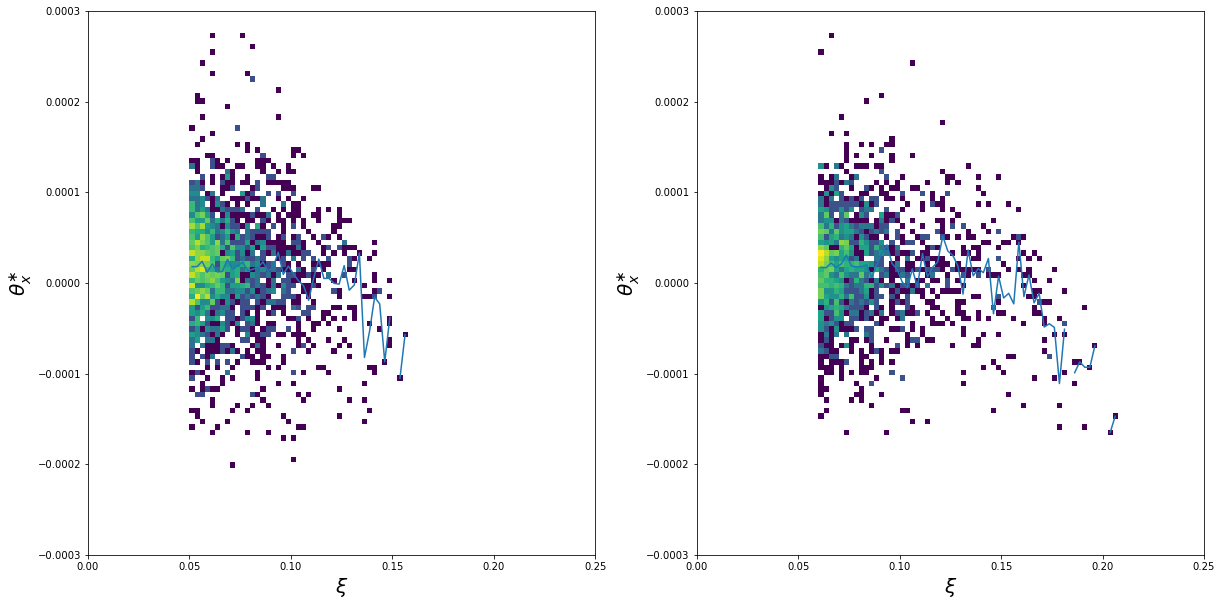

In [21]:
if proton_selection == "MultiRP":
    msk_excl = ( df_signal["InvMass"] >= 110. ) & ( df_signal["Acopl"] <= 0.009 ) & ( df_signal["ExtraPfCands"] <= 1 )
    # Multi-RP
    # msk1 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 0 )
    # msk2 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 1 )
    msk1 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 0 ) & ( df_signal.loc[ :, "Xi"] >= 0.050 )
    msk2 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 1 ) & ( df_signal.loc[ :, "Xi"] >= 0.060 )

    print ( len(df_signal[ "Xi" ][ msk1 ]), len(df_signal[ "Xi" ][ msk2 ]) )

    fig, axes = plt.subplots( 1, 2, figsize=(20,10) )
    h_, xedges_, yedges_, im_ = axes[0].hist2d( df_signal[ "Xi" ][ msk1 ], df_signal[ "ThX" ][ msk1 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
    bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
    bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
    axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
    axes[0].set_xlabel( r"$\xi$", fontsize=20 )
    axes[0].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
    h_, xedges_, yedges_, im_ = axes[1].hist2d( df_signal[ "Xi" ][ msk2 ], df_signal[ "ThX" ][ msk2 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
    bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
    bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
    axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
    axes[1].set_xlabel( r"$\xi$", fontsize=20 )
    axes[1].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )

2259 1736


(0.0, 0.15)

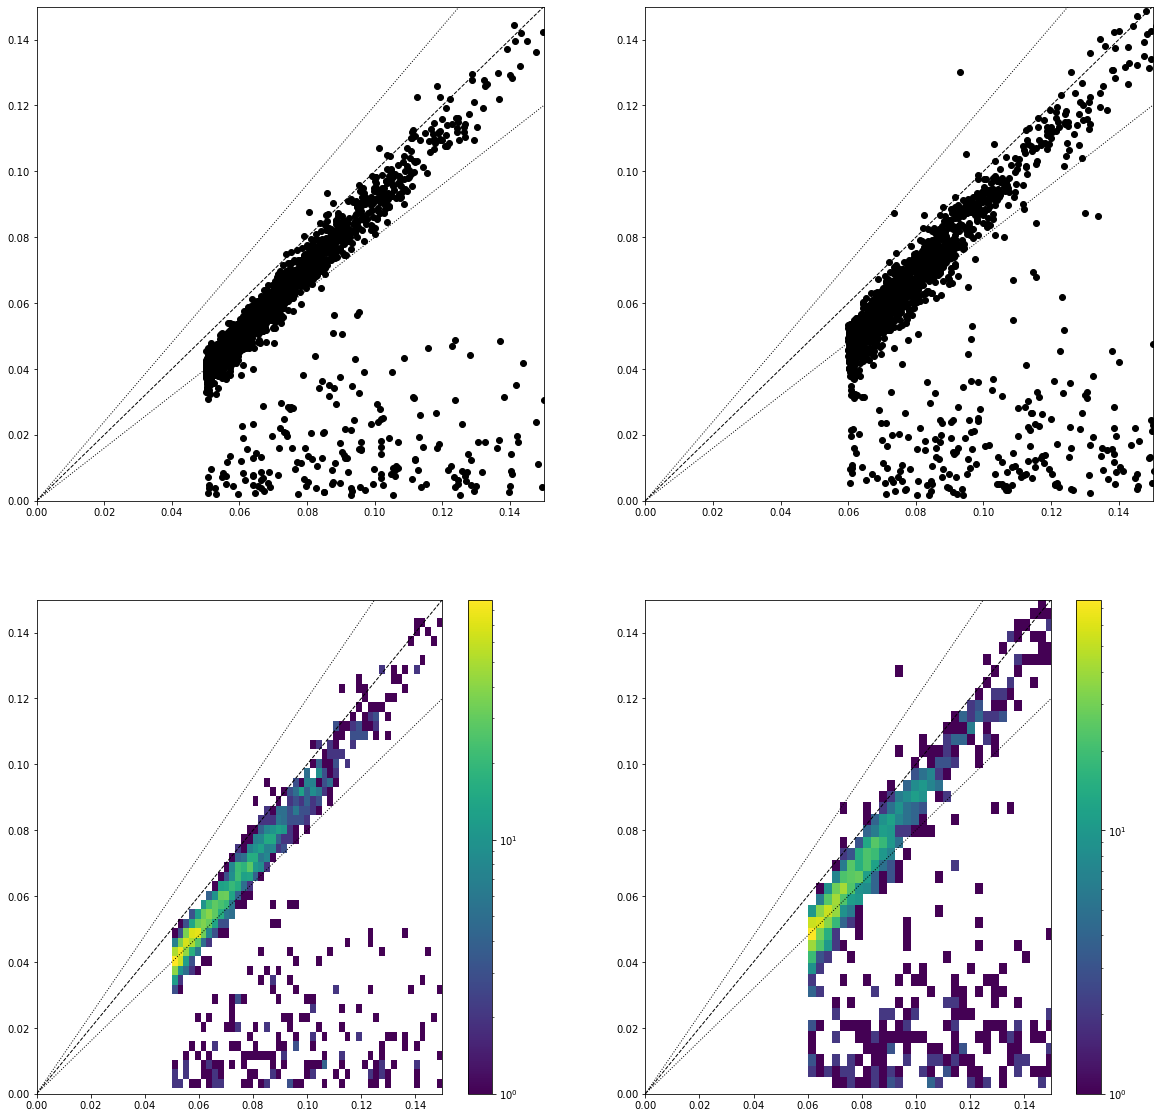

In [28]:
msk_excl = ( df_signal["InvMass"] >= 110. ) & ( df_signal["Acopl"] <= 0.009 ) & ( df_signal["ExtraPfCands"] <= 1 )
#msk_excl = ( df_signal["InvMass"] >= 110. ) & ( df_signal["Acopl"] <= 0.009 ) & ( df_signal["ExtraPfCands"] <= 0 )

#msk1 = msk_excl & ( df_signal["MultiRP"] == 0) & ( df_signal["RPId1"] == 23 )
#msk2 = msk_excl & ( df_signal["MultiRP"] == 0) & ( df_signal["RPId1"] == 123 )
#msk1 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 0 )
#msk2 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 1 )

msk1 = None
msk2 = None
if proton_selection == "SingleRP":
    # Single-RP in pixel stations
    msk1 = msk_excl & ( df_signal["MultiRP"] == 0) & ( df_signal["RPId1"] == 23 )
    msk2 = msk_excl & ( df_signal["MultiRP"] == 0) & ( df_signal["RPId1"] == 123 )
elif proton_selection == "MultiRP":
    # Multi-RP
    # msk1 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 0 )
    # msk2 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 1 )
    msk1 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 0 ) & ( df_signal.loc[ :, "Xi"] >= 0.050 )
    msk2 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 1 ) & ( df_signal.loc[ :, "Xi"] >= 0.060 )

print ( len(df_signal[ "Xi" ][ msk1 ]), len(df_signal[ "Xi" ][ msk2 ]) )

fig, axes = plt.subplots( 2, 2, figsize=(20,20) )
axes[0,0].plot( df_signal[ "Xi" ][ msk1 ], df_signal[ "XiMuMuPlus" ][ msk1 ], 'ko' )
axes[0,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,0.80*0.15), 'k:', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,1.20*0.15), 'k:', linewidth=1 )
axes[0,0].set_xlim(0.,0.15)
axes[0,0].set_ylim(0.,0.15)
axes[0,1].plot( df_signal[ "Xi" ][ msk2 ], df_signal[ "XiMuMuMinus" ][ msk2 ], 'ko' )
axes[0,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,0.80*0.15), 'k:', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,1.20*0.15), 'k:', linewidth=1 )
axes[0,1].set_xlim(0.,0.15)
axes[0,1].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,0].hist2d( df_signal[ "Xi" ][ msk1 ], df_signal[ "XiMuMuPlus" ][ msk1 ], bins=(50,50), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,0])
axes[1,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,0.80*0.15), 'k:', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,1.20*0.15), 'k:', linewidth=1 )
axes[1,0].set_xlim(0.,0.15)
axes[1,0].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,1].hist2d( df_signal[ "Xi" ][ msk2 ], df_signal[ "XiMuMuMinus" ][ msk2 ], bins=(50,50), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,1])
axes[1,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,0.80*0.15), 'k:', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,1.20*0.15), 'k:', linewidth=1 )
axes[1,1].set_xlim(0.,0.15)
axes[1,1].set_ylim(0.,0.15)

(array([  2.,   2.,   3.,   2.,   1.,   3.,   3.,   5.,   4.,   3.,   5.,
          1.,   5.,   8.,   9.,   5.,   3.,   5.,   5.,   4.,   7.,   2.,
          2.,   2.,   4.,   7.,   5.,  26., 105., 526., 745.,  66.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([-5.        , -4.84000015, -4.67999983, -4.51999998, -4.36000013,
        -4.19999981, -4.03999996, -3.88000011, -3.72000003, -3.55999994,
        -3.4000001 , -3.24000001, -3.07999992, -2.92000008, -2.75999999,
        -2.5999999 , -2.44000006, -2.27999997, -2.11999989, -1.96000004,
        -1.79999995, -1.63999999, -1.48000002, -1.32000005, -1.15999997,
        -1.        , -0.83999997, -0.68000001, -0.51999998, -0.36000001,
        -0.2       , -0.04      ,  0.12      ,  0.28      ,  0.44      ,
         0.60000002,  0.75999999,  0.92000002,  1.08000004,  1.24000001,
         1.39999998,  1.55999994,  1.72000003,  1.88      ,  2.03999996,
 

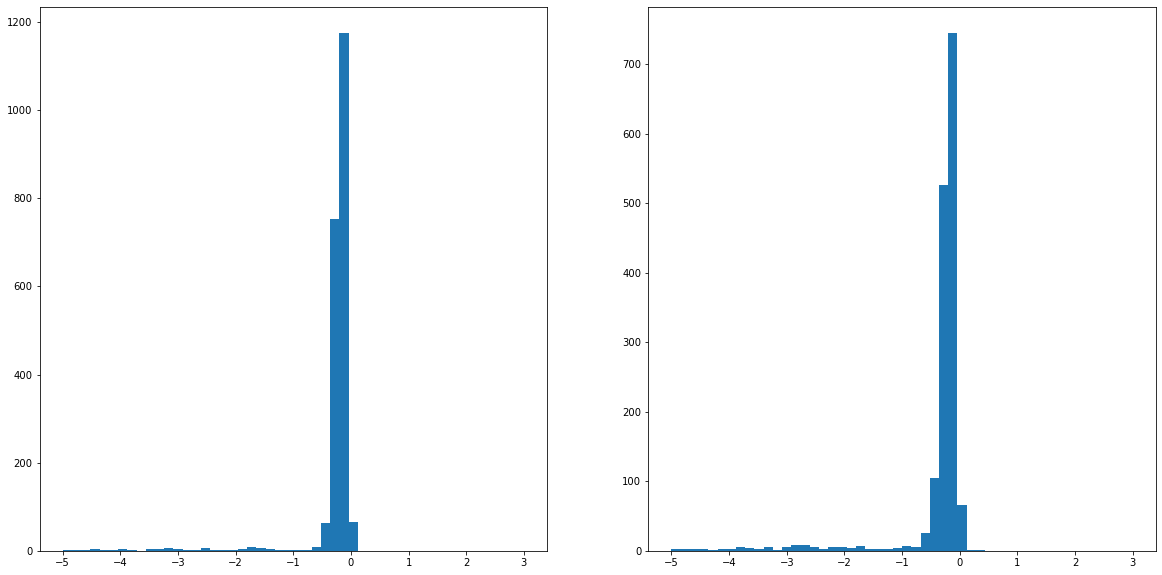

In [29]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )
axes[0].hist( ( 1. - df_signal[ "Xi" ][ msk1 ] / df_signal[ "XiMuMuPlus" ][ msk1 ] ), bins=50, range=(-5.,3.) )
axes[1].hist( ( 1. - df_signal[ "Xi" ][ msk2 ] / df_signal[ "XiMuMuMinus" ][ msk2 ] ), bins=50, range=(-5.,3.) )

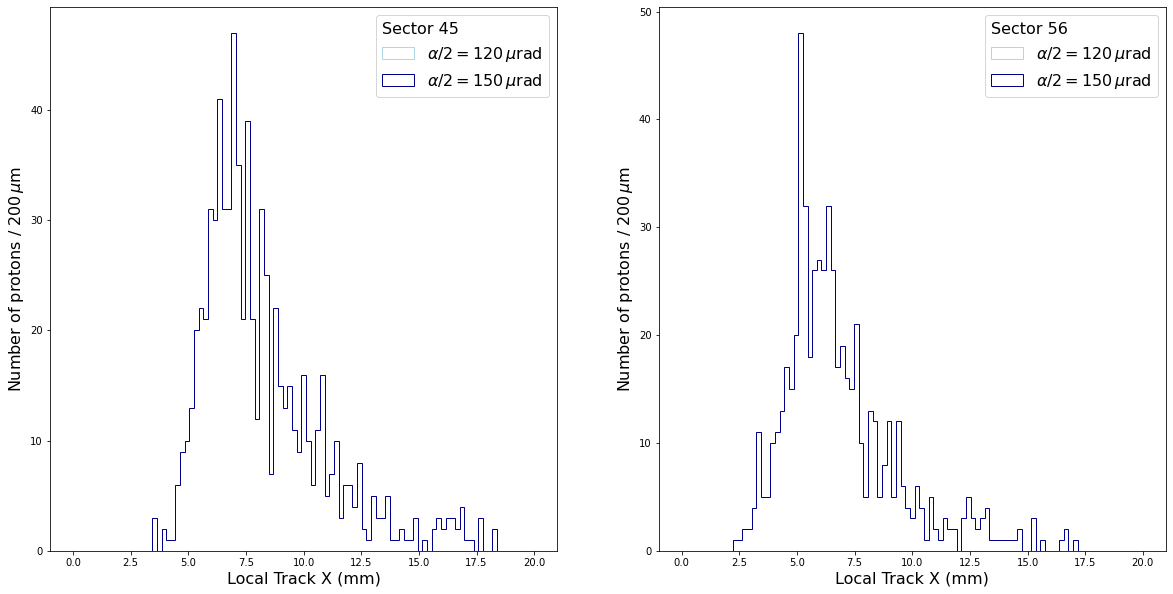

In [24]:
var_ = "TrackX2"

xangle_str_ = "CrossingAngle"
# xangle_str_ = "CrossingAngle_rnd"

msk1_xangle1  = msk1 & ( ( df_signal[ xangle_str_ ] >= 120 ) & ( df_signal[ xangle_str_ ] < 130 ) )
msk1_xangle2  = msk1 & ( ( df_signal[ xangle_str_ ] >= 140 ) & ( df_signal[ xangle_str_ ] < 150 ) )
msk2_xangle1  = msk2 & ( ( df_signal[ xangle_str_ ] >= 120 ) & ( df_signal[ xangle_str_ ] < 130 ) )
msk2_xangle2  = msk2 & ( ( df_signal[ xangle_str_ ] >= 140 ) & ( df_signal[ xangle_str_ ] < 150 ) )

fig, axes = plt.subplots( 1, 2, figsize=(20,10) )
axes[0].hist( df_signal[ var_ ][ msk1_xangle1 ], histtype="step", color="lightblue", bins=np.linspace( 0., 20., int(20./0.2) ), label=r"$\alpha/2=120\,\mu\rm{rad}$" )
axes[0].hist( df_signal[ var_ ][ msk1_xangle2 ], histtype="step", color="darkblue", bins=np.linspace( 0., 20., int(20./0.2) ), label=r"$\alpha/2=150\,\mu\rm{rad}$" )
axes[1].hist( df_signal[ var_ ][ msk2_xangle1 ], histtype="step", color="lightblue", bins=np.linspace( 0., 20., int(20./0.2) ), label=r"$\alpha/2=120\,\mu\rm{rad}$" )
axes[1].hist( df_signal[ var_ ][ msk2_xangle2 ], histtype="step", color="darkblue", bins=np.linspace (0., 20, int(20./0.2) ), label=r"$\alpha/2=150\,\mu\rm{rad}$" )
axes[0].set_xlabel( "Local Track X (mm)", fontsize=16 )
axes[0].set_ylabel( "Number of protons / " + r"$200\,\mu\rm{m}$", fontsize=16 )
leg_ = axes[0].legend( fontsize=16 )
leg_.set_title( "Sector 45", prop={'size': 16} )
leg_._legend_box.align = "left"
axes[1].set_xlabel( "Local Track X (mm)", fontsize=16 )
axes[1].set_ylabel( "Number of protons / " + r"$200\,\mu\rm{m}$", fontsize=16 )
leg_ = axes[1].legend( fontsize=16 )
leg_.set_title( "Sector 56", prop={'size': 16} )
leg_._legend_box.align = "left"
#plt.savefig( "LocalTrack_X_vs_xangle.pdf" )

# Data

In [21]:
# df_data_list = []
# df_counts_data_list = []

#resample_factor = 1
#resample_factor = 20

#with h5py.File('output/output-UL2017B-PreSel.h5', 'r') as f:
#with h5py.File('output/output-UL2017B-Excl.h5', 'r') as f:    
#with h5py.File('output/output-UL2017C1-PreSel.h5', 'r') as f:
#with h5py.File('output/output-UL2017C1-Excl.h5', 'r') as f:

#fileNames = [
#    'output-UL2017B-PreSel.h5'
#]

# fileNames = [
#    'output/output-UL2017B-PreSel.h5',
#    'output/output-UL2017C1-PreSel.h5',
#    'output/output-UL2017E-PreSel.h5',
#    'output/output-UL2017F1-PreSel.h5'
# ]

#fileNames = [
#    'output/output-UL2017B-PreSel-Pt1_30-Pt2_20.h5',
#    'output/output-UL2017C1-PreSel-Pt1_30-Pt2_20.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20_0.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20_1.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20_2.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20_3.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20_4.h5',
#    'output/output-UL2017F1-PreSel-Pt1_30-Pt2_20.h5'
#]

fileNames_data = [
    'output/output-test-2018A-PreSel-Pt1_30-Pt2_20_0.h5',
    'output/output-test-2018A-PreSel-Pt1_30-Pt2_20_1.h5',
    'output/output-test-2018B-PreSel-Pt1_30-Pt2_20.h5'
]

# for file_ in fileNames:
#     with h5py.File( file_, 'r' ) as f:
#         print ( f )
#         print ( list(f.keys()) )
#         dset = f['protons_multiRP']
#         print ( dset.shape )
#         print ( dset[:,:] )
        
#         dset_columns = f['columns']
#         print ( dset_columns.shape )
#         columns = list( dset_columns )
#         print ( columns )
#         columns_str = [ item.decode("utf-8") for item in columns ]
#         print ( columns_str )

#         dset_selections = f['selections']
#         selections_ = [ item.decode("utf-8") for item in dset_selections ]
#         print ( selections_ )  
        
#         dset_counts = f['event_counts']
#         df_counts_data_list.append( pd.Series( dset_counts, index=selections_ ) )
#         print ( df_counts_data_list[-1] )
        
#         chunk_size = 500000
#         entries = dset.shape[0]
#         start_ = list( range( 0, entries, chunk_size ) )
#         stop_ = start_[1:]
#         stop_.append( entries )
#         print ( start_ )
#         print ( stop_ )
#         for idx in range( len( start_ ) ):
#             print ( start_[idx], stop_[idx] )
#             #print ( dset[ start_[idx] : stop_[idx] ] )
#             df_data_list.append( pd.DataFrame( dset[ start_[idx] : stop_[idx] ], columns=columns_str ) )
#             print ( df_data_list[-1].head() )
#             print ( len( df_data_list[-1] ) )

df_counts_data, df_protons_multiRP_data, df_protons_singleRP_data = get_data( fileNames_data, version='V2' )

output/output-test-2018A-PreSel-Pt1_30-Pt2_20_0.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(1472117, 43)
[[3.1525700e+05 1.8000000e+01 2.2750000e+03 ... 8.3733991e-02
  2.7342396e-02 4.5660669e-03]
 [3.1525700e+05 1.8000000e+01 1.3370000e+03 ... 5.2114505e-02
  4.5250235e-03 1.1323434e-02]
 [3.1525700e+05 1.8000000e+01 1.3370000e+03 ... 5.2114505e-02
  4.5250235e-03 1.1323434e-02]
 ...
 [3.1621900e+05 8.6000000e+01 2.1980000e+03 ... 6.1329018e-02
  1.0757368e-02 4.7535333e-03]
 [3.1621900e+05 8.6000000e+01 7.4300000e+02 ... 1.7481605e-02
  1.1710340e-02 4.4167642e-03]
 [3.1621900e+05 8.6000000e+01 2.5000000e+02 ... 2.5729600e-03
  6.4582615e-03 3.4527946e-02]]
(3828866, 43)
[[3.1525700e+05 1.8000000e+01 2.2750000e+03 ... 8.3733991e-02
  2.7342396e-02 4.5660669e-03]
 [3.1525700e+05 1.8000000e+01 2.2750000e+03 ... 8.3733991e-02
  2.7342396e-02 4.5660669e-03]
 [3.1525700e+05 1.8000000e+01 1.3370000e+03 ... 5.2114505e-02
  4.5250235e-03 1.1323434e-0

In [22]:
# df_counts_data = df_counts_data_list[0];
# for idx in range( 1, len(df_counts_data_list) ):
#     df_counts_data = df_counts_data.add( df_counts_data_list[idx] )
df_counts_data

All                   34814138
Muon                   4221470
Vertex                 3899712
Protons_check_none     3899712
Protons                2850298
dtype: int64

In [23]:
# df_data = pd.concat( df_data_list )

In [24]:
#msk_invmass = ( df_data["InvMass"] >= 110. )
#df_data = df_data[msk_invmass]
df_data = df_protons_multiRP_data
df_data

,Run,LumiSection,BX,EventNum,Slice,CrossingAngle,MultiRP,Arm,RPId1,RPId2,...,Muon1Eta,Muon1Phi,Muon1VtxZ,nVertices,PrimVertexZ,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus
0,315257,18,2275.0,12676441,0,150.0,1,1,103,123,...,0.731491,1.184738,-2.951744,49,-2.953488,127.948288,46,0.083734,0.027342,0.004566
1,315257,18,1337.0,12713573,0,150.0,1,0,3,23,...,-0.674570,1.541486,-5.516215,35,-5.515947,89.357193,54,0.052115,0.004525,0.011323
2,315257,18,1337.0,12713573,0,150.0,1,1,103,123,...,-0.674570,1.541486,-5.516215,35,-5.515947,89.357193,54,0.052115,0.004525,0.011323
3,315257,18,2231.0,12443853,0,150.0,1,0,3,23,...,0.475279,-2.630966,-0.467422,30,-0.468110,194.005829,53,0.215707,0.010065,0.023472
4,315257,18,2231.0,12443853,0,150.0,1,1,103,123,...,0.475279,-2.630966,-0.467422,30,-0.468110,194.005829,53,0.215707,0.010065,0.023472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16670,317626,172,324.0,229507824,0,159.0,1,0,3,23,...,1.524680,-0.705685,1.421916,39,1.431756,89.888557,46,0.117447,0.039009,0.001283
16671,317626,172,2135.0,229862544,0,159.0,1,1,103,123,...,0.119674,0.497768,-2.625890,32,-2.629983,79.761795,16,0.058388,0.009913,0.004343
16672,317626,172,2135.0,229862544,0,159.0,1,1,103,123,...,0.119674,0.497768,-2.625890,32,-2.629983,79.761795,16,0.058388,0.009913,0.004343
16673,317626,172,668.0,229944384,0,159.0,1,0,3,23,...,0.670504,1.630814,-7.563051,26,-7.562870,113.133255,34,0.023673,0.022401,0.003386


In [25]:
df_data_events = df_data.set_index( ["Run", "LumiSection", "EventNum", "Slice"] ).drop( columns=['Xi', 'MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2'] )
df_data_events = df_data_events[ ~df_data_events.index.duplicated(keep='first') ]
#msk_invmass = ( df_data_events["InvMass"] >= 110. )
#df_data_events = df_data_events[msk_invmass]
print ( len( df_data_events ) )

2848095


(array([62040., 61293., 59523., 58429., 57152., 55464., 53727., 52506.,
        51203., 49650., 48321., 46999., 45635., 44267., 42764., 41796.,
        41185., 39544., 38841., 37422., 36383., 35638., 34875., 33884.,
        32930., 32144., 31328., 30085., 29836., 29109., 28252., 27522.,
        27218., 26206., 25621., 24671., 24553., 23812., 23389., 22790.,
        22449., 21847., 21518., 20939., 20325., 20247., 19462., 18969.,
        18597., 18472.]),
 array([0.        , 0.004     , 0.008     , 0.012     , 0.016     ,
        0.02      , 0.024     , 0.028     , 0.032     , 0.036     ,
        0.04      , 0.044     , 0.048     , 0.052     , 0.056     ,
        0.06      , 0.064     , 0.068     , 0.072     , 0.076     ,
        0.08      , 0.084     , 0.088     , 0.092     , 0.096     ,
        0.1       , 0.104     , 0.108     , 0.112     , 0.116     ,
        0.12      , 0.124     , 0.12800001, 0.132     , 0.13600001,
        0.14      , 0.14399999, 0.148     , 0.152     , 0.156     

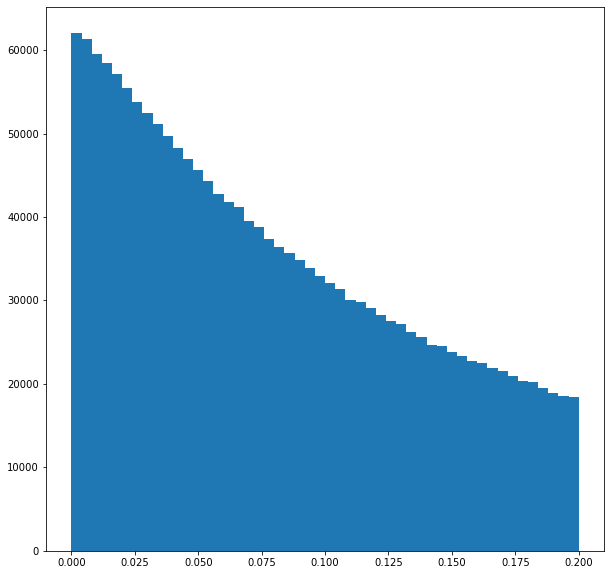

In [26]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_data_events["Acopl"], bins=50, range=(0.,0.2) )
#plt.yscale( "log" )

(array([   773.,   1510.,   2795.,   4357.,   6088.,   8037.,  10315.,
         12807.,  15443.,  18305.,  21064.,  24077.,  27214.,  29852.,
         32693.,  35114.,  37841.,  40532.,  43025.,  44728.,  46905.,
         49070.,  50478.,  51756.,  53927.,  55134.,  56210.,  57096.,
         57426., 115804.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]),
 <BarContainer object of 30 artists>)

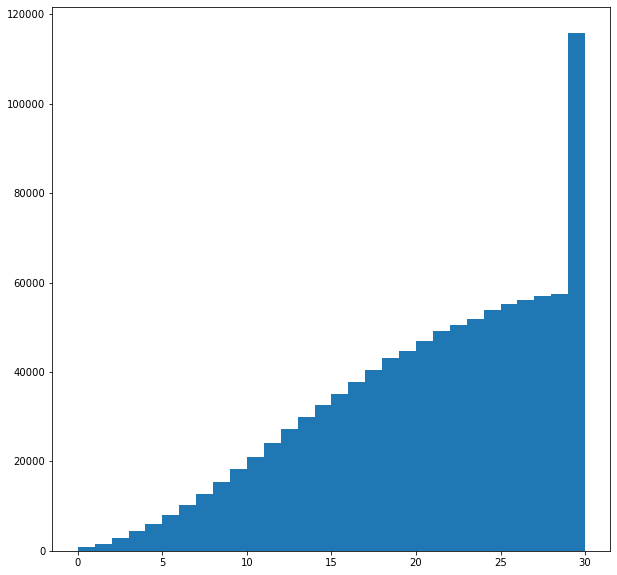

In [27]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_data_events["ExtraPfCands"], bins=30, range=(0.,30) )
#plt.yscale( "log" )

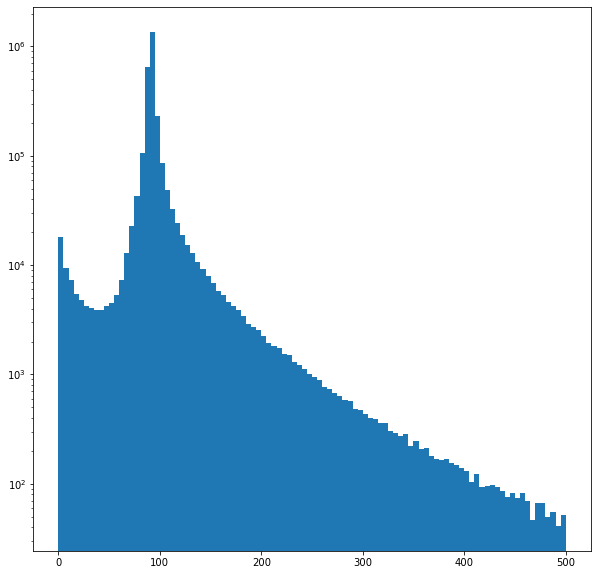

In [28]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_data_events["InvMass"], bins=100, range=(0.,500.) )
#plt.hist( df_data_events["InvMass"], bins=100, range=(70.,110.) )
plt.yscale( "log" )

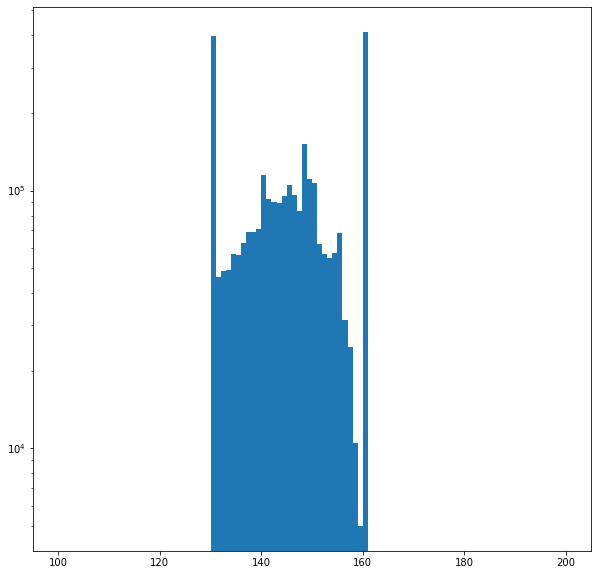

In [29]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_data_events["CrossingAngle"], bins=100, range=(100.,200.) )
plt.yscale( "log" )

194 236


Text(0, 0.5, 'Y (mm)')

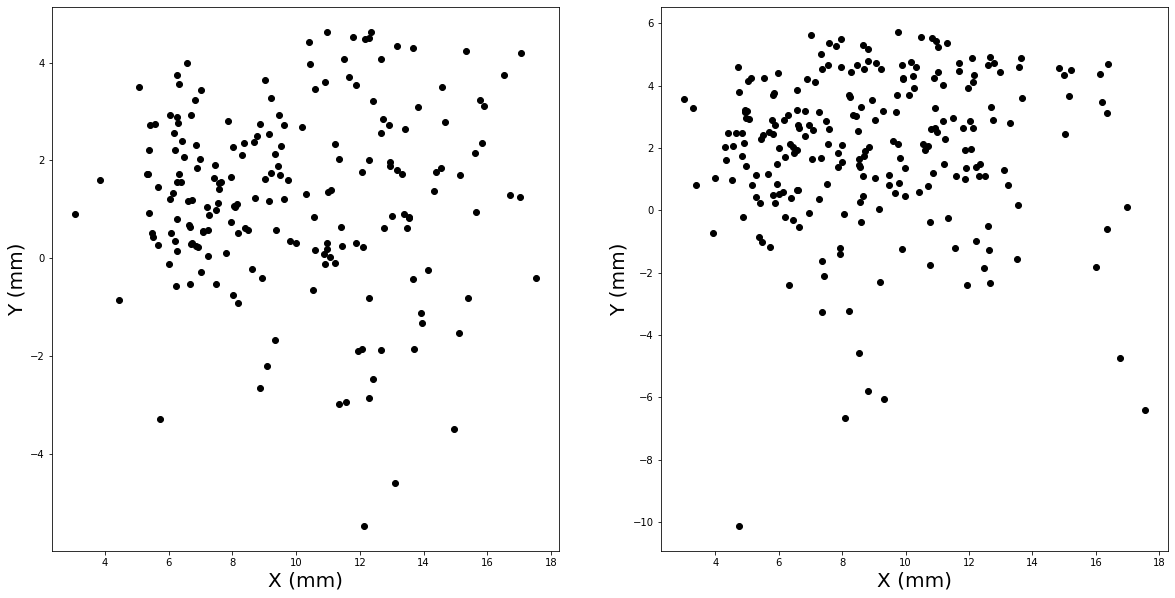

In [30]:
msk_excl_data = ( df_data["InvMass"] >= 110. ) & ( df_data["Acopl"] <= 0.009 ) & ( df_data["ExtraPfCands"] <= 1 )
#msk_excl_data = ( df_data["InvMass"] >= 0. )

msk1_data = None
msk2_data = None
if proton_selection == "SingleRP":
    # Single-RP in pixel stations
    msk1_data = msk_excl_data & ( df_data["MultiRP"] == 0) & ( df_data["RPId1"] == 23 )
    msk2_data = msk_excl_data & ( df_data["MultiRP"] == 0) & ( df_data["RPId1"] == 123 )
elif proton_selection == "MultiRP":
    # Multi-RP
    # msk1_data = msk_excl_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 0 )
    # msk2_data = msk_excl_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 1 )
    msk1_data = msk_excl_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 0 ) & ( df_data.loc[ :, "Xi"] >= 0.050 )
    msk2_data = msk_excl_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 1 ) & ( df_data.loc[ :, "Xi"] >= 0.060 )

print ( len(df_data[ "Xi" ][ msk1_data ]), len(df_data[ "Xi" ][ msk2_data ]) )

fig, axes = plt.subplots( 1, 2, figsize=(20,10) )
axes[0].plot( df_data[ "TrackX1" ][ msk1_data ], df_data[ "TrackY1" ][ msk1_data ], 'ko' )
# axes[0].hist2d( df_data[ "TrackX1" ][ msk1_data ], df_data[ "TrackY1" ][ msk1_data ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0].set_xlabel( "X (mm)", fontsize=20 )
axes[0].set_ylabel( "Y (mm)", fontsize=20 )
axes[1].plot( df_data[ "TrackX1" ][ msk2_data ], df_data[ "TrackY1" ][ msk2_data ], 'ko' )
# axes[1].hist2d( df_data[ "TrackX1" ][ msk2_data ], df_data[ "TrackY1" ][ msk2_data ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1].set_xlabel( "X (mm)", fontsize=20 )
axes[1].set_ylabel( "Y (mm)", fontsize=20 )

1987611 2385718


/tmp/ipykernel_562/1989175409.py:16: RuntimeWarning: invalid value encountered in divide
  axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
/tmp/ipykernel_562/1989175409.py:22: RuntimeWarning: invalid value encountered in divide
  axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )


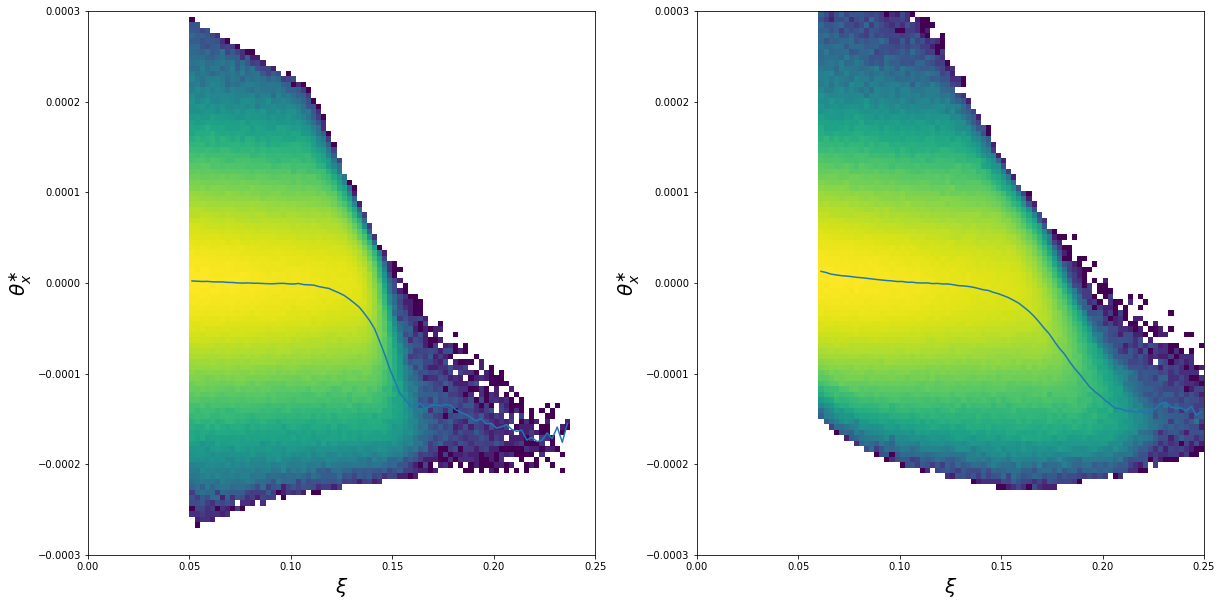

In [31]:
if proton_selection == "MultiRP":
    #msk_excl_data = ( df_data["InvMass"] >= 110. ) & ( df_data["Acopl"] <= 0.009 ) & ( df_data["ExtraPfCands"] <= 1 )
    msk_excl_data = ( df_data["InvMass"] >= 0. )
    # Multi-RP
    # msk1_data = msk_excl_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 0 )
    # msk2_data = msk_excl_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 1 )
    msk1_data = msk_excl_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 0 ) & ( df_data.loc[ :, "Xi"] >= 0.050 )
    msk2_data = msk_excl_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 1 ) & ( df_data.loc[ :, "Xi"] >= 0.060 )

    print ( len(df_data[ "Xi" ][ msk1_data ]), len(df_data[ "Xi" ][ msk2_data ]) )

    fig, axes = plt.subplots( 1, 2, figsize=(20,10) )
    h_, xedges_, yedges_, im_ = axes[0].hist2d( df_data[ "Xi" ][ msk1_data ], df_data[ "ThX" ][ msk1_data ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
    bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
    bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
    axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
    axes[0].set_xlabel( r"$\xi$", fontsize=20 )
    axes[0].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
    h_, xedges_, yedges_, im_ = axes[1].hist2d( df_data[ "Xi" ][ msk2_data ], df_data[ "ThX" ][ msk2_data ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
    bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
    bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
    axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
    axes[1].set_xlabel( r"$\xi$", fontsize=20 )
    axes[1].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )

194 236


(0.0, 0.15)

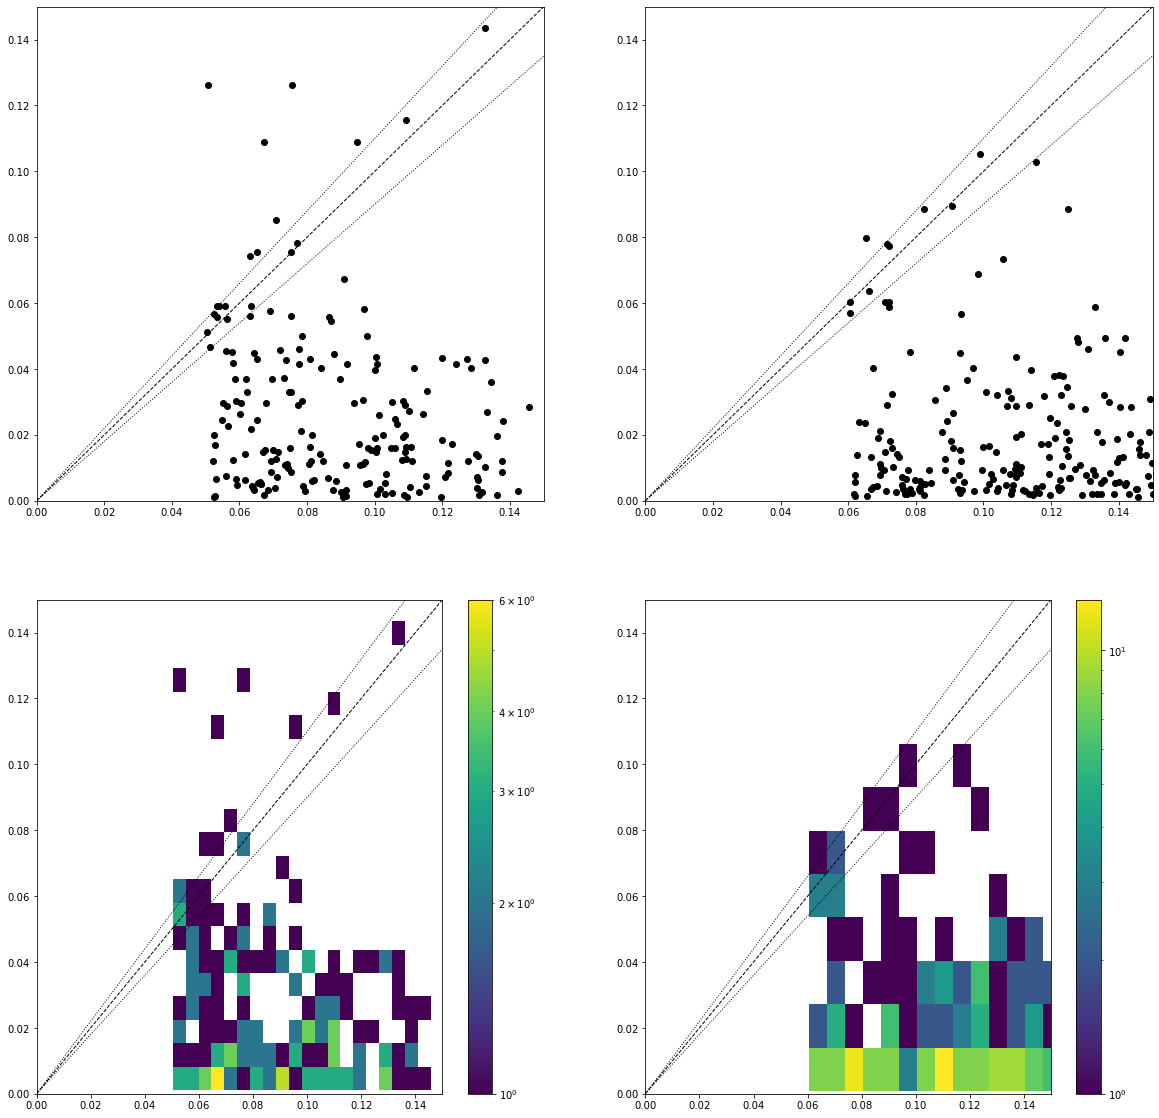

In [33]:
#np.random.seed( 42 )

# msk_excl_data = ( df_data["InvMass"] >= 110. )
# msk_excl_data = ( df_data["InvMass"] >= 110. ) & ( df_data["Acopl"] <= 0.009 )
msk_excl_data = ( df_data["InvMass"] >= 110. ) & ( df_data["Acopl"] <= 0.009 ) & ( df_data["ExtraPfCands"] <= 1 )
# msk_excl_data = ( df_data["InvMass"] >= 110. ) & ( df_data["Acopl"] <= 0.009 ) & ( df_data["ExtraPfCands"] <= 0 )
# msk_excl_data = ( df_data["InvMass"] >= 110. ) & ( df_data["Acopl"] > 0.009 ) & ( df_data["ExtraPfCands"] <= 1 )

#msk1 = msk_excl & ( df_data["MultiRP"] == 0 ) & ( df_data["RPId1"] == 23 )
#msk2 = msk_excl & ( df_data["MultiRP"] == 0 ) & ( df_data["RPId1"] == 123 )
#msk1 = msk_excl & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 0 )
#msk2 = msk_excl & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 1 )

msk1_data = None
msk2_data = None
if proton_selection == "SingleRP":
    # Single-RP in pixel stations
    msk1_data = msk_excl_data & ( df_data["MultiRP"] == 0) & ( df_data["RPId1"] == 23 )
    msk2_data = msk_excl_data & ( df_data["MultiRP"] == 0) & ( df_data["RPId1"] == 123 )
elif proton_selection == "MultiRP":
    # Multi-RP
    # msk1_data = msk_excl_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 0 )
    # msk2_data = msk_excl_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 1 )
    msk1_data = msk_excl_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 0 ) & ( df_data.loc[ :, "Xi"] >= 0.050 )
    msk2_data = msk_excl_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 1 ) & ( df_data.loc[ :, "Xi"] >= 0.060 )

print ( len(df_data[ "Xi" ][ msk1_data ]), len(df_data[ "Xi" ][ msk2_data ]) )

fig, axes = plt.subplots( 2, 2, figsize=(20,20) )
axes[0,0].plot( df_data[ "Xi" ][ msk1_data ], df_data[ "XiMuMuPlus" ][ msk1_data ], 'ko' )
axes[0,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,0].set_xlim(0.,0.15)
axes[0,0].set_ylim(0.,0.15)
axes[0,1].plot( df_data[ "Xi" ][ msk2_data ], df_data[ "XiMuMuMinus" ][ msk2_data ], 'ko' )
axes[0,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,1].set_xlim(0.,0.15)
axes[0,1].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,0].hist2d( df_data[ "Xi" ][ msk1_data ], df_data[ "XiMuMuPlus" ][ msk1_data ], bins=(20,20), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,0])
axes[1,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,0].set_xlim(0.,0.15)
axes[1,0].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,1].hist2d( df_data[ "Xi" ][ msk2_data ], df_data[ "XiMuMuMinus" ][ msk2_data ], bins=(20,20), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,1])
axes[1,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,1].set_xlim(0.,0.15)
axes[1,1].set_ylim(0.,0.15)

In [34]:
resample_factor = 50

# df_bkg_list = []
# df_counts_bkg_list = []

#with h5py.File('output/output-UL2017B-PreSel-Rnd-Res20.h5', 'r') as f:
#with h5py.File('output/output-UL2017C1-PreSel-Rnd-Res20.h5', 'r') as f:    

# fileNames_bkg = [
#     'output/output-UL2017B-PreSel-Rnd-Res20.h5',
#     'output/output-UL2017C1-PreSel-Rnd-Res20.h5',
#     'output/output-UL2017E-PreSel-Rnd-Res20_0.h5',
#     'output/output-UL2017E-PreSel-Rnd-Res20_1.h5',
#     'output/output-UL2017F1-PreSel-Rnd-Res20.h5'
# ]
#fileNames_bkg = [
#    'output/output-UL2017B-PreSel-Pt1_30-Pt2_20-Rnd-Res20_0.h5',
#    'output/output-UL2017B-PreSel-Pt1_30-Pt2_20-Rnd-Res20_1.h5',
#    'output/output-UL2017B-PreSel-Pt1_30-Pt2_20-Rnd-Res20_2.h5',
#    'output/output-UL2017C1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_0.h5',
#    'output/output-UL2017C1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_1.h5',
#    'output/output-UL2017C1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_2.h5',
#    'output/output-UL2017C1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_3.h5',
#    'output/output-UL2017C1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_4.h5',
#    'output/output-UL2017C1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_5.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_0.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_1.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_2.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_3.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_4.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_5.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_6.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_7.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_8.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_9.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_10.h5',
#    'output/output-UL2017F1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_0.h5',
#    'output/output-UL2017F1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_1.h5',
#    'output/output-UL2017F1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_2.h5'
#]

# for file_ in fileNames_bkg:
#     with h5py.File( file_, 'r' ) as f:
#         print ( file_ )    
#         print ( list(f.keys()) )
#         dset = f['protons']
#         print ( dset.shape )
#         print ( dset[:,:] )
        
#         dset_columns = f['columns']
#         print ( dset_columns.shape )
#         columns = list( dset_columns )
#         print ( columns )
#         columns_str = [ item.decode("utf-8") for item in columns ]
#         print ( columns_str )

#         dset_selections = f['selections']
#         selections_ = [ item.decode("utf-8") for item in dset_selections ]
#         print ( selections_ )
        
#         dset_counts = f['event_counts']
#         df_counts_bkg_list.append( pd.Series( dset_counts, index=selections_ ) )
#         print ( df_counts_bkg_list[-1] )
       
#         #chunk_size = 500000
#         chunk_size = 100000
#         entries = dset.shape[0]
#         start_ = list( range( 0, entries, chunk_size ) )
#         stop_ = start_[1:]
#         stop_.append( entries )
#         print ( start_ )
#         print ( stop_ )
#         for idx in range( len( start_ ) ):
#             print ( start_[idx], stop_[idx] )
#             #print ( dset[ start_[idx] : stop_[idx] ] )
#             df_bkg_list.append( pd.DataFrame( dset[ start_[idx] : stop_[idx] ], columns=columns_str ) )
#             print ( df_bkg_list[-1].head() )
#             print ( len( df_bkg_list[-1] ) )

fileNames_bkg = [
    'output/output-test-2018A-Excl-Pt1_30-Pt2_20-random-resample_50_0_0.h5',
    'output/output-test-2018A-Excl-Pt1_30-Pt2_20-random-resample_50_0_1.h5',
    'output/output-test-2018A-Excl-Pt1_30-Pt2_20-random-resample_50_1_0.h5',
    'output/output-test-2018A-Excl-Pt1_30-Pt2_20-random-resample_50_1_1.h5',
    'output/output-test-2018A-Excl-Pt1_30-Pt2_20-random-resample_50_1_2.h5',
    'output/output-test-2018B-Excl-Pt1_30-Pt2_20-random-resample_50_0.h5',
    'output/output-test-2018B-Excl-Pt1_30-Pt2_20-random-resample_50_1.h5'
    ]
df_counts_bkg, df_protons_multiRP_bkg, df_protons_singleRP_bkg = get_data( fileNames_bkg, version='V2' )

output/output-test-2018A-Excl-Pt1_30-Pt2_20-random-resample_50_0_0.h5
['columns', 'event_counts', 'protons_multiRP', 'protons_singleRP', 'selections']
(2750, 47)
[[3.1536100e+05 5.5900000e+02 4.7700000e+02 ... 5.5900000e+02
  4.6378195e+08 1.5000000e+02]
 [3.1536100e+05 5.5900000e+02 4.7700000e+02 ... 5.5900000e+02
  4.6378195e+08 1.5000000e+02]
 [3.1536100e+05 5.5900000e+02 4.7700000e+02 ... 5.5900000e+02
  4.6378195e+08 1.5000000e+02]
 ...
 [3.1672200e+05 3.4000000e+02 2.7480000e+03 ... 2.4800000e+02
  3.1588365e+08 1.6000000e+02]
 [3.1672200e+05 3.4000000e+02 2.7480000e+03 ... 2.4800000e+02
  3.1588365e+08 1.6000000e+02]
 [3.1672200e+05 3.4000000e+02 2.7480000e+03 ... 2.4800000e+02
  3.1588365e+08 1.6000000e+02]]
(6900, 47)
[[3.1536100e+05 5.5900000e+02 4.7700000e+02 ... 5.5900000e+02
  4.6378195e+08 1.5000000e+02]
 [3.1536100e+05 5.5900000e+02 4.7700000e+02 ... 5.5900000e+02
  4.6378195e+08 1.5000000e+02]
 [3.1536100e+05 5.5900000e+02 4.7700000e+02 ... 5.5900000e+02
  4.6378195e+08

[[3.0412500e+05 6.7300000e+02 7.8800000e+02 ... 2.8255475e-01
  3.5535751e-03 1.7850535e-02]
 [3.0412500e+05 6.7300000e+02 7.8800000e+02 ... 2.8255475e-01
  3.5535751e-03 1.7850535e-02]
 [3.0412500e+05 6.7300000e+02 7.8800000e+02 ... 2.8255475e-01
  3.5535751e-03 1.7850535e-02]
 ...
 [3.0388500e+05 9.0100000e+02 1.6790000e+03 ... 4.4969523e-01
  3.2551270e-02 2.2802711e-03]
 [3.0388500e+05 9.0100000e+02 1.6790000e+03 ... 4.4969523e-01
  3.2551270e-02 2.2802711e-03]
 [3.0388500e+05 9.0100000e+02 1.6790000e+03 ... 4.4969523e-01
  3.2551270e-02 2.2802711e-03]]
(43,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'Slice', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2ThX_MultiRP', b'Track2ThY_MultiRP', b'TrackPixShift_SingleRP', b'Track1PixShift_MultiRP', b'Track2PixShift_MultiRP', b'Muon0Pt', b'Muon

        Run  LumiSection      BX     EventNum  Slice  CrossingAngle  MultiRP  \
0  304209.0        325.0  2685.0  547607104.0   19.0          140.0      0.0   
1  304209.0        325.0  2685.0  547607104.0   19.0          140.0      0.0   
2  304209.0        325.0  2685.0  547607104.0   19.0          140.0      0.0   
3  304209.0        325.0  2685.0  547607104.0   19.0          140.0      0.0   
4  304209.0        325.0  2685.0  547607104.0   19.0          140.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0   23.0   -1.0  ...  1.520762 -2.756793  -2.318085       31.0   
1 -999.0   23.0   -1.0  ...  1.520762 -2.756793  -2.318085       31.0   
2 -999.0  103.0   -1.0  ...  1.520762 -2.756793  -2.318085       31.0   
3 -999.0  123.0   -1.0  ...  1.520762 -2.756793  -2.318085       31.0   
4 -999.0  123.0   -1.0  ...  1.520762 -2.756793  -2.318085       31.0   

   PrimVertexZ    InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0  

        Run  LumiSection      BX     EventNum  Slice  CrossingAngle  MultiRP  \
0  304169.0        295.0  2611.0  447821824.0    4.0          140.0      0.0   
1  304169.0        295.0  2611.0  447821824.0    4.0          140.0      0.0   
2  304169.0        295.0  2611.0  447821824.0    4.0          140.0      0.0   
3  304169.0        295.0  2611.0  447821824.0    4.0          140.0      1.0   
4  304169.0        295.0   385.0  447568288.0    4.0          140.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0  103.0   -1.0  ... -1.258809  1.158213   1.263305       31.0   
1 -999.0  123.0   -1.0  ... -1.258809  1.158213   1.263305       31.0   
2 -999.0  123.0   -1.0  ... -1.258809  1.158213   1.263305       31.0   
3    1.0  103.0  123.0  ... -1.258809  1.158213   1.263305       31.0   
4 -999.0  123.0   -1.0  ...  1.224584 -2.301029  -4.130117       36.0   

   PrimVertexZ    InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0  

        Run  LumiSection      BX      EventNum  Slice  CrossingAngle  MultiRP  \
0  304333.0       1523.0  1403.0  2.236326e+09    5.0          120.0      0.0   
1  304333.0       1523.0  1403.0  2.236326e+09    5.0          120.0      0.0   
2  304333.0       1524.0   445.0  2.236839e+09    5.0          120.0      0.0   
3  304333.0       1524.0   445.0  2.236839e+09    5.0          120.0      0.0   
4  304333.0       1524.0   445.0  2.236839e+09    5.0          120.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0  123.0   -1.0  ...  0.530590 -2.062698   2.609104       19.0   
1 -999.0  123.0   -1.0  ...  0.530590 -2.062698   2.609104       19.0   
2 -999.0   23.0   -1.0  ...  0.981842  1.128600   7.152431       20.0   
3 -999.0  123.0   -1.0  ...  0.981842  1.128600   7.152431       20.0   
4 -999.0  123.0   -1.0  ...  0.981842  1.128600   7.152431       20.0   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinu

        Run  LumiSection      BX      EventNum  Slice  CrossingAngle  MultiRP  \
0  304797.0       1544.0  2093.0  2.468682e+09    7.0          120.0      0.0   
1  304797.0       1544.0  2093.0  2.468682e+09    7.0          120.0      0.0   
2  304797.0       1544.0  2093.0  2.468682e+09    7.0          120.0      1.0   
3  304797.0       1545.0  3439.0  2.469850e+09    7.0          120.0      0.0   
4  304797.0       1545.0  2091.0  2.469829e+09    7.0          120.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0  123.0   -1.0  ...  0.479180  1.756531   1.443182       22.0   
1 -999.0  123.0   -1.0  ...  0.479180  1.756531   1.443182       22.0   
2    0.0    3.0   23.0  ...  0.479180  1.756531   1.443182       22.0   
3 -999.0   23.0   -1.0  ...  0.225333 -2.621816   3.716725       18.0   
4 -999.0  123.0   -1.0  ...  0.851718 -0.976745  -0.610405       21.0   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinu

        Run  LumiSection     BX      EventNum  Slice  CrossingAngle  MultiRP  \
0  304738.0        724.0  386.0  1.249284e+09   19.0          130.0      0.0   
1  304738.0        724.0  386.0  1.249284e+09   19.0          130.0      0.0   
2  304738.0        724.0  386.0  1.249284e+09   19.0          130.0      0.0   
3  304738.0        724.0  386.0  1.249284e+09   19.0          130.0      0.0   
4  304738.0        724.0  386.0  1.249284e+09   19.0          130.0      1.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0   23.0   -1.0  ...  0.342149 -2.345681  -0.157936       52.0   
1 -999.0   23.0   -1.0  ...  0.342149 -2.345681  -0.157936       52.0   
2 -999.0  103.0   -1.0  ...  0.342149 -2.345681  -0.157936       52.0   
3 -999.0  123.0   -1.0  ...  0.342149 -2.345681  -0.157936       52.0   
4    1.0  103.0  123.0  ...  0.342149 -2.345681  -0.157936       52.0   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0 

        Run  LumiSection     BX      EventNum  Slice  CrossingAngle  MultiRP  \
0  304797.0       1419.0  302.0  2.330682e+09    1.0          120.0      0.0   
1  304797.0       1419.0  302.0  2.330682e+09    1.0          120.0      0.0   
2  304797.0       1419.0  302.0  2.330682e+09    1.0          120.0      0.0   
3  304797.0       1419.0  302.0  2.330682e+09    1.0          120.0      0.0   
4  304797.0       1419.0  302.0  2.330682e+09    1.0          120.0      1.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0   23.0   -1.0  ... -1.420962  2.340286   5.354559       39.0   
1 -999.0   23.0   -1.0  ... -1.420962  2.340286   5.354559       39.0   
2 -999.0  103.0   -1.0  ... -1.420962  2.340286   5.354559       39.0   
3 -999.0  123.0   -1.0  ... -1.420962  2.340286   5.354559       39.0   
4    1.0  103.0  123.0  ... -1.420962  2.340286   5.354559       39.0   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0 

        Run  LumiSection      BX      EventNum  Slice  CrossingAngle  MultiRP  \
0  303885.0       1321.0  1553.0  1.719806e+09    2.0          130.0      0.0   
1  303885.0       1321.0  1553.0  1.719806e+09    2.0          130.0      0.0   
2  303885.0       1321.0  1553.0  1.719806e+09    2.0          130.0      0.0   
3  303885.0       1321.0  1553.0  1.719806e+09    2.0          130.0      0.0   
4  303885.0       1321.0  1553.0  1.719806e+09    2.0          130.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0  123.0   -1.0  ...  0.759099  0.559623   2.150961       25.0   
1 -999.0  123.0   -1.0  ...  0.759099  0.559623   2.150961       25.0   
2 -999.0  123.0   -1.0  ...  0.759099  0.559623   2.150961       25.0   
3 -999.0  123.0   -1.0  ...  0.759099  0.559623   2.150961       25.0   
4 -999.0  123.0   -1.0  ...  0.759099  0.559623   2.150961       25.0   

   PrimVertexZ    InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus

        Run  LumiSection      BX      EventNum  Slice  CrossingAngle  MultiRP  \
0  304778.0        705.0  2382.0  1.126206e+09    6.0          120.0      0.0   
1  304778.0        705.0  2382.0  1.126206e+09    6.0          120.0      0.0   
2  304778.0        705.0  2382.0  1.126206e+09    6.0          120.0      1.0   
3  304778.0        705.0  2267.0  1.126185e+09    6.0          120.0      0.0   
4  304778.0        705.0  2267.0  1.126185e+09    6.0          120.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0  103.0   -1.0  ... -1.096211  2.265400  -0.900246       25.0   
1 -999.0  123.0   -1.0  ... -1.096211  2.265400  -0.900246       25.0   
2    1.0  103.0  123.0  ... -1.096211  2.265400  -0.900246       25.0   
3 -999.0  103.0   -1.0  ... -1.030907 -0.004996  -3.921212       31.0   
4 -999.0  123.0   -1.0  ... -1.030907 -0.004996  -3.921212       31.0   

   PrimVertexZ    InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus

        Run  LumiSection      BX      EventNum  Slice  CrossingAngle  MultiRP  \
0  305064.0       1253.0  1652.0  1.682284e+09    4.0          120.0      0.0   
1  305064.0       1253.0  1652.0  1.682284e+09    4.0          120.0      0.0   
2  305064.0       1253.0  1652.0  1.682284e+09    4.0          120.0      1.0   
3  305064.0       1254.0  3126.0  1.683126e+09    4.0          120.0      0.0   
4  305064.0       1254.0  3126.0  1.683126e+09    4.0          120.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0    3.0   -1.0  ... -1.370069  2.899266   2.956842       24.0   
1 -999.0   23.0   -1.0  ... -1.370069  2.899266   2.956842       24.0   
2    0.0    3.0   23.0  ... -1.370069  2.899266   2.956842       24.0   
3 -999.0  123.0   -1.0  ... -1.042857  2.380677   2.882799       14.0   
4 -999.0  123.0   -1.0  ... -1.042857  2.380677   2.882799       14.0   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinu

        Run  LumiSection      BX      EventNum  Slice  CrossingAngle  MultiRP  \
0  305045.0        606.0  3139.0  1.002454e+09   18.0          120.0      0.0   
1  305045.0        606.0  3139.0  1.002454e+09   18.0          120.0      0.0   
2  305045.0        606.0  3139.0  1.002454e+09   18.0          120.0      1.0   
3  305045.0        607.0  1486.0  1.003828e+09   18.0          120.0      0.0   
4  305045.0        607.0  1486.0  1.003828e+09   18.0          120.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0  103.0   -1.0  ...  1.407866  1.432250  -1.123343       25.0   
1 -999.0  123.0   -1.0  ...  1.407866  1.432250  -1.123343       25.0   
2    1.0  103.0  123.0  ...  1.407866  1.432250  -1.123343       25.0   
3 -999.0    3.0   -1.0  ...  0.669306  1.623108  -5.043192       36.0   
4 -999.0  103.0   -1.0  ...  0.669306  1.623108  -5.043192       36.0   

   PrimVertexZ    InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus

        Run  LumiSection      BX     EventNum  Slice  CrossingAngle  MultiRP  \
0  305081.0        397.0  2481.0  667072064.0   14.0          150.0      0.0   
1  305081.0        397.0  2481.0  667072064.0   14.0          150.0      0.0   
2  305081.0        397.0  2481.0  667072064.0   14.0          150.0      1.0   
3  305081.0        397.0  2498.0  666827904.0   14.0          150.0      0.0   
4  305081.0        397.0  2498.0  666827904.0   14.0          150.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0  123.0   -1.0  ...  1.444564 -0.228620  -1.379423       35.0   
1 -999.0  123.0   -1.0  ...  1.444564 -0.228620  -1.379423       35.0   
2    0.0    3.0   23.0  ...  1.444564 -0.228620  -1.379423       35.0   
3 -999.0  123.0   -1.0  ... -0.370961 -1.208631  -0.800980       37.0   
4 -999.0  123.0   -1.0  ... -0.370961 -1.208631  -0.800980       37.0   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0 

In [35]:
# df_counts_bkg = df_counts_bkg_list[0]
# for idx in range( 1, len( df_counts_bkg_list ) ):
#     df_counts_bkg = df_counts_bkg.add( df_counts_bkg_list[idx] )
df_counts_bkg

All                      1740706900
Muon                      211073500
Vertex                    194985600
Exclusive                     20250
ProtonsRnd_check_none         20250
ProtonsRnd                    15050
dtype: int64

In [36]:
# df_bkg = pd.concat( df_bkg_list )

In [37]:
#msk_invmass = ( df_bkg["InvMass"] >= 110. )
#df_bkg = df_bkg[msk_invmass]
df_bkg = df_protons_multiRP_bkg
df_bkg

,Run,LumiSection,BX,EventNum,Slice,CrossingAngle,MultiRP,Arm,RPId1,RPId2,...,PrimVertexZ,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus,Run_rnd,LumiSection_rnd,EventNum_rnd,CrossingAngle_rnd
0,315361,559,477.0,463781952,0,150.0,1,0,3,23,...,-3.088300,193.104279,1,0.005335,0.014794,0.014917,315361,559,463781952,150.0
1,315361,559,477.0,463781952,0,150.0,1,0,3,23,...,-3.088300,193.104279,1,0.005335,0.014794,0.014917,315361,559,463781952,150.0
2,315361,559,477.0,463781952,1,150.0,1,0,3,23,...,-3.088300,193.104279,1,0.005335,0.014794,0.014917,315361,559,463781952,150.0
3,315361,559,477.0,463781952,1,150.0,1,0,3,23,...,-3.088300,193.104279,1,0.005335,0.014794,0.014917,315361,559,463781952,150.0
4,315361,559,477.0,463781952,2,150.0,1,0,3,23,...,-3.088300,193.104279,1,0.005335,0.014794,0.014917,315361,559,463781952,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6145,317626,219,2204.0,300424736,49,157.0,1,1,103,123,...,2.270493,117.382370,0,0.008612,0.045906,0.001784,317626,83,94725888,160.0
6146,317626,331,1095.0,467028512,49,154.0,1,0,3,23,...,1.368888,173.524368,1,0.001297,0.045976,0.003875,317626,331,467028512,154.0
6147,317626,331,1095.0,467028512,49,154.0,1,0,3,23,...,1.368888,173.524368,1,0.001297,0.045976,0.003875,317626,331,467028512,154.0
6148,317626,331,1095.0,467028512,49,154.0,1,0,3,23,...,1.368888,173.524368,1,0.001297,0.045976,0.003875,317626,331,467028512,154.0


In [38]:
#df_bkg_events = df_bkg.set_index( ["Run", "LumiSection", "EventNum"] ).drop( columns=['Xi', 'MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2'] )
#df_bkg_events = df_bkg_events[ ~df_bkg_events.index.duplicated(keep='first') ]
#print ( len( df_bkg_events ) )

In [39]:
#fig = plt.figure( figsize=(10,10) )
#plt.hist( df_data_events["Acopl"], bins=50, range=(0.,0.2) )
#plt.hist( df_data_events["ExtraPfCands"], bins=30, range=(0.,30) )
#plt.hist( df_data_events["InvMass"], bins=100, range=(0.,500) )
#plt.yscale( "log" )

9700 11800


Text(0, 0.5, 'Y (mm)')

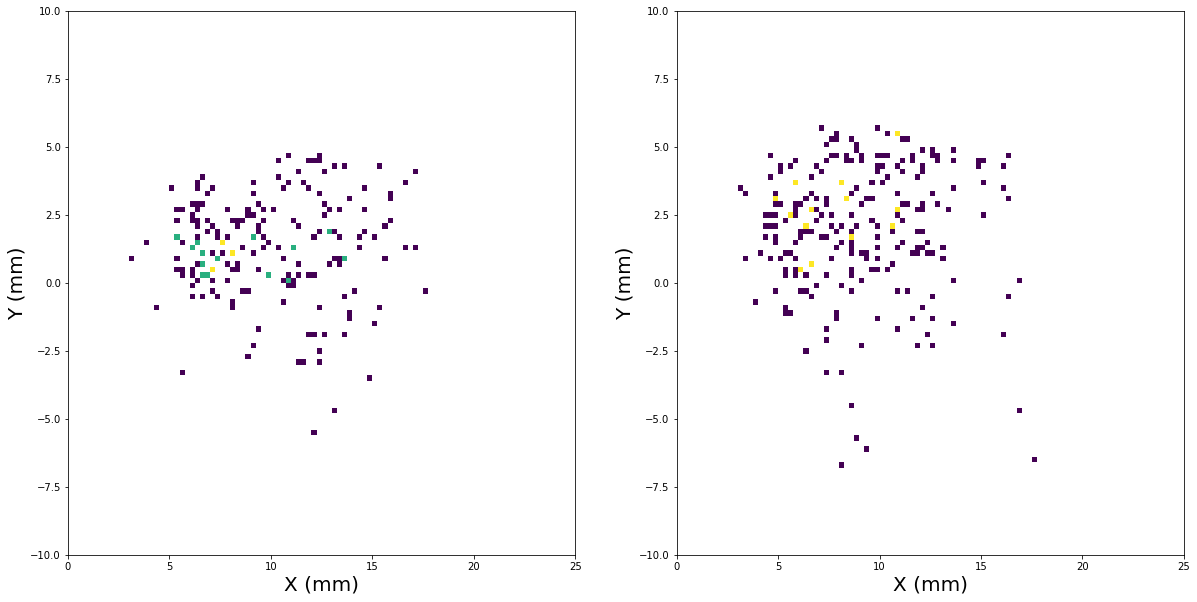

In [40]:
msk_excl_bkg = ( df_bkg["InvMass"] >= 110. ) & ( df_bkg["Acopl"] <= 0.009 ) & ( df_bkg["ExtraPfCands"] <= 1 )
#msk_excl_bkg = ( df_bkg["InvMass"] >= 0. )

msk1_bkg = None
msk2_bkg = None
if proton_selection == "SingleRP":
    # Single-RP in pixel stations
    msk1_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 0) & ( df_bkg["RPId1"] == 23 )
    msk2_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 0) & ( df_bkg["RPId1"] == 123 )
elif proton_selection == "MultiRP":
    # Multi-RP
    # msk1_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 0 )
    # msk2_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 1 )
    msk1_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 0 ) & ( df_bkg.loc[ :, "Xi"] >= 0.050 )
    msk2_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 1 ) & ( df_bkg.loc[ :, "Xi"] >= 0.060 )

print ( len(df_bkg[ "Xi" ][ msk1_bkg ]), len(df_bkg[ "Xi" ][ msk2_bkg ]) )

fig, axes = plt.subplots( 1, 2, figsize=(20,10) )
axes[0].hist2d( df_bkg[ "TrackX1" ][ msk1_bkg ], df_bkg[ "TrackY1" ][ msk1_bkg ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0].set_xlabel( "X (mm)", fontsize=20 )
axes[0].set_ylabel( "Y (mm)", fontsize=20 )
axes[1].hist2d( df_bkg[ "TrackX1" ][ msk2_bkg ], df_bkg[ "TrackY1" ][ msk2_bkg ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1].set_xlabel( "X (mm)", fontsize=20 )
axes[1].set_ylabel( "Y (mm)", fontsize=20 )

9700 11800


/tmp/ipykernel_562/3887555801.py:16: RuntimeWarning: invalid value encountered in divide
  axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
/tmp/ipykernel_562/3887555801.py:22: RuntimeWarning: invalid value encountered in divide
  axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )


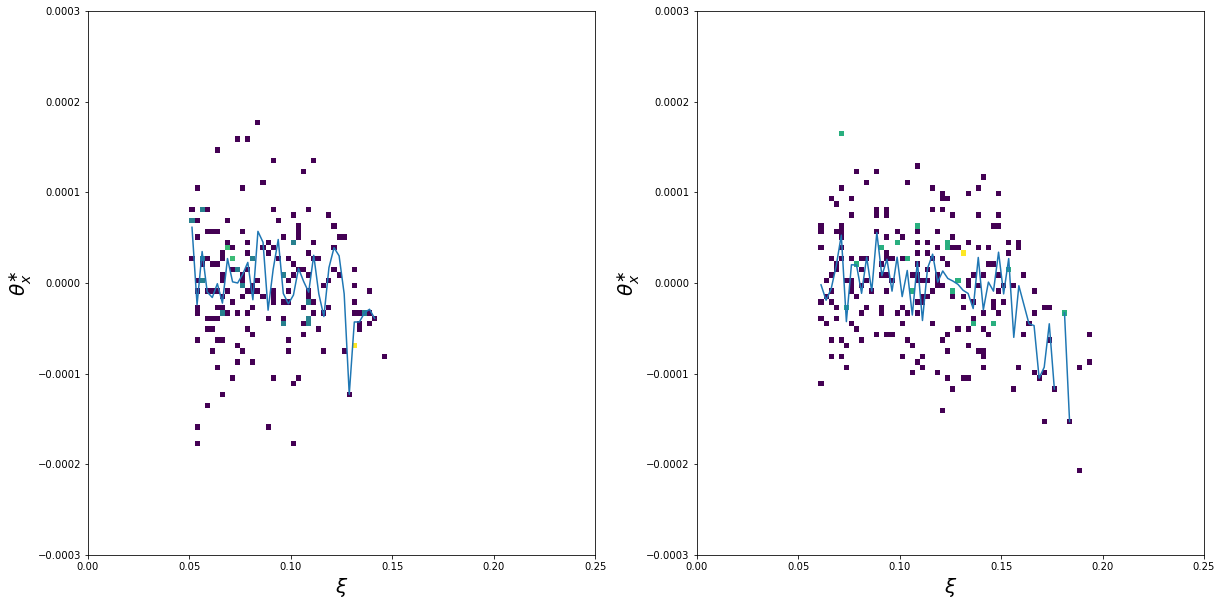

In [41]:
if proton_selection == "MultiRP":
    msk_excl_bkg = ( df_bkg["InvMass"] >= 110. ) & ( df_bkg["Acopl"] <= 0.009 ) & ( df_bkg["ExtraPfCands"] <= 1 )
    msk_excl_bkg = ( df_bkg["InvMass"] >= 0. )
    # Multi-RP
    # msk1_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 0 )
    # msk2_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 1 )
    msk1_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 0 ) & ( df_bkg.loc[ :, "Xi"] >= 0.050 )
    msk2_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 1 ) & ( df_bkg.loc[ :, "Xi"] >= 0.060 )

    print ( len(df_bkg[ "Xi" ][ msk1_bkg ]), len(df_bkg[ "Xi" ][ msk2_bkg ]) )

    fig, axes = plt.subplots( 1, 2, figsize=(20,10) )
    h_, xedges_, yedges_, im_ = axes[0].hist2d( df_bkg[ "Xi" ][ msk1_bkg ], df_bkg[ "ThX" ][ msk1_bkg ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
    bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
    bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
    axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
    axes[0].set_xlabel( r"$\xi$", fontsize=20 )
    axes[0].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
    h_, xedges_, yedges_, im_ = axes[1].hist2d( df_bkg[ "Xi" ][ msk2_bkg], df_bkg[ "ThX" ][ msk2_bkg ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
    bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
    bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
    axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
    axes[1].set_xlabel( r"$\xi$", fontsize=20 )
    axes[1].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )

9700 11800


(0.0, 0.15)

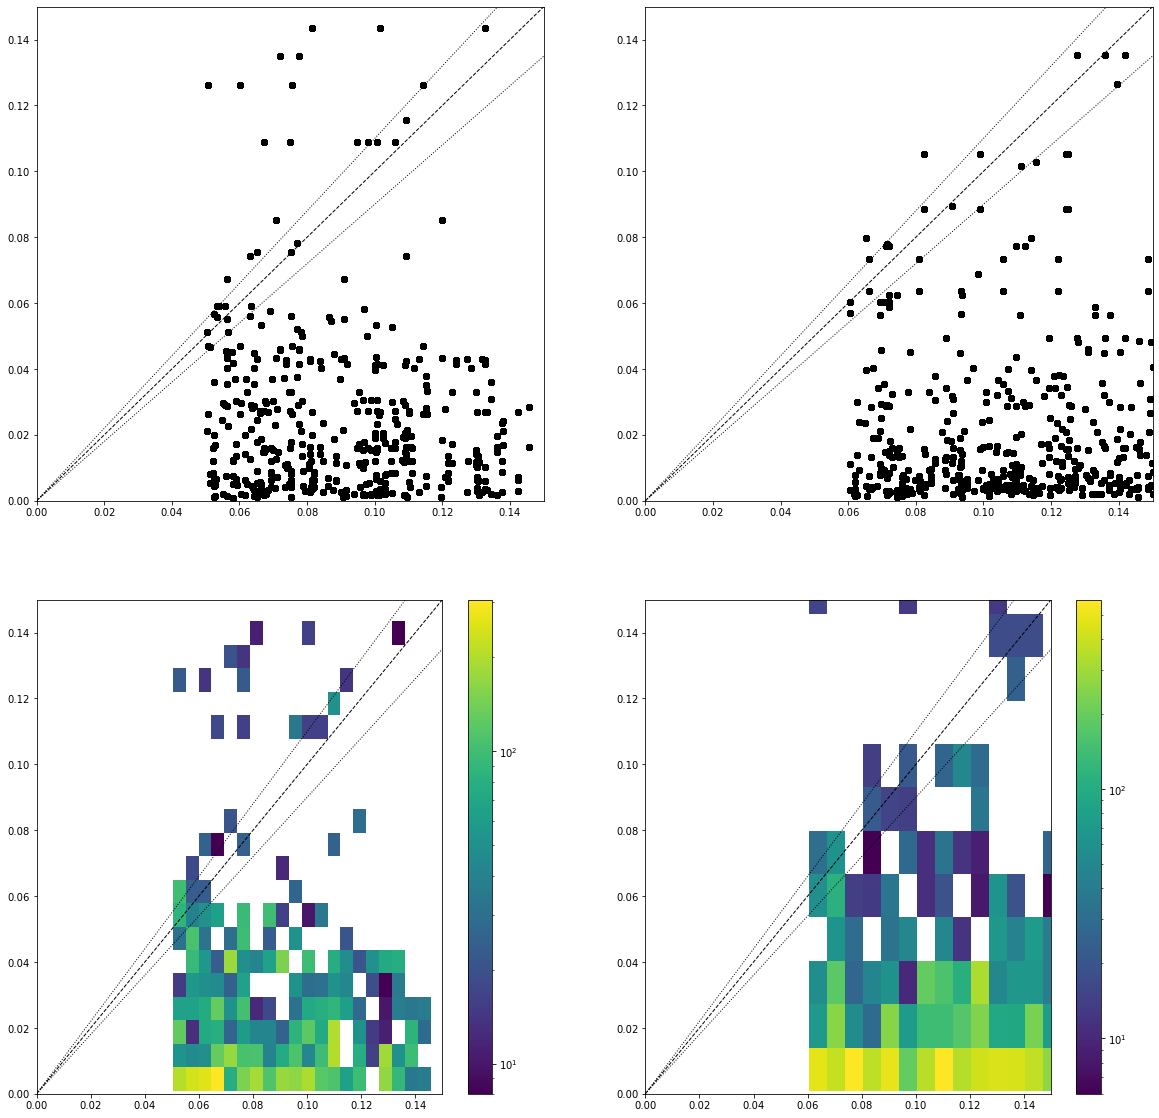

In [42]:
msk_excl_bkg = ( df_bkg["InvMass"] >= 110. ) & ( df_bkg["Acopl"] <= 0.009 ) & ( df_bkg["ExtraPfCands"] <= 1 )
#msk_excl_bkg = ( df_bkg["InvMass"] >= 110. ) & ( df_bkg["Acopl"] <= 0.009 ) & ( df_bkg["ExtraPfCands"] <= 0 )
#msk_excl_bkg = ( df_bkg["InvMass"] >= 110. ) & ( df_bkg["Acopl"] > 0.009 ) & ( df_bkg["ExtraPfCands"] <= 1 )

msk1_bkg = None
msk2_bkg = None
if proton_selection == "SingleRP":
    # Single-RP in pixel stations
    msk1_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 0) & ( df_bkg["RPId1"] == 23 )
    msk2_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 0) & ( df_bkg["RPId1"] == 123 )
elif proton_selection == "MultiRP":
    # Multi-RP
    # msk1_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 0 )
    # msk2_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 1 )
    msk1_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 0 ) & ( df_bkg.loc[ :, "Xi"] >= 0.050 )
    msk2_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 1 ) & ( df_bkg.loc[ :, "Xi"] >= 0.060 )

print ( len(df_bkg[ "Xi" ][ msk1_bkg ]), len(df_bkg[ "Xi" ][ msk2_bkg ]) )

fig, axes = plt.subplots( 2, 2, figsize=(20,20) )
axes[0,0].plot( df_bkg[ "Xi" ][ msk1_bkg ], df_bkg[ "XiMuMuPlus" ][ msk1_bkg ], 'ko' )
axes[0,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,0].set_xlim(0.,0.15)
axes[0,0].set_ylim(0.,0.15)
axes[0,1].plot( df_bkg[ "Xi" ][ msk2_bkg ], df_bkg[ "XiMuMuMinus" ][ msk2_bkg ], 'ko' )
axes[0,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,1].set_xlim(0.,0.15)
axes[0,1].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,0].hist2d( df_bkg[ "Xi" ][ msk1_bkg ], df_bkg[ "XiMuMuPlus" ][ msk1_bkg ], bins=(20,20), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,0])
axes[1,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,0].set_xlim(0.,0.15)
axes[1,0].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,1].hist2d( df_bkg[ "Xi" ][ msk2_bkg ], df_bkg[ "XiMuMuMinus" ][ msk2_bkg ], bins=(20,20), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,1])
axes[1,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,1].set_xlim(0.,0.15)
axes[1,1].set_ylim(0.,0.15)

[ 4  4  5  6  6  4  3  8 10  9 15 12 18  3  0  0  0  0  0  0] [-5.  -4.6 -4.2 -3.8 -3.4 -3.  -2.6 -2.2 -1.8 -1.4 -1.  -0.6 -0.2  0.2
  0.6  1.   1.4  1.8  2.2  2.6  3. ]
[ 4  3  8  6  5  7  8  9 12  3  3  4 12  2  0  0  0  0  0  0] [-5.  -4.6 -4.2 -3.8 -3.4 -3.  -2.6 -2.2 -1.8 -1.4 -1.  -0.6 -0.2  0.2
  0.6  1.   1.4  1.8  2.2  2.6  3. ]
y max. = 26.485281374238568


(0.0, 26.485281374238568)

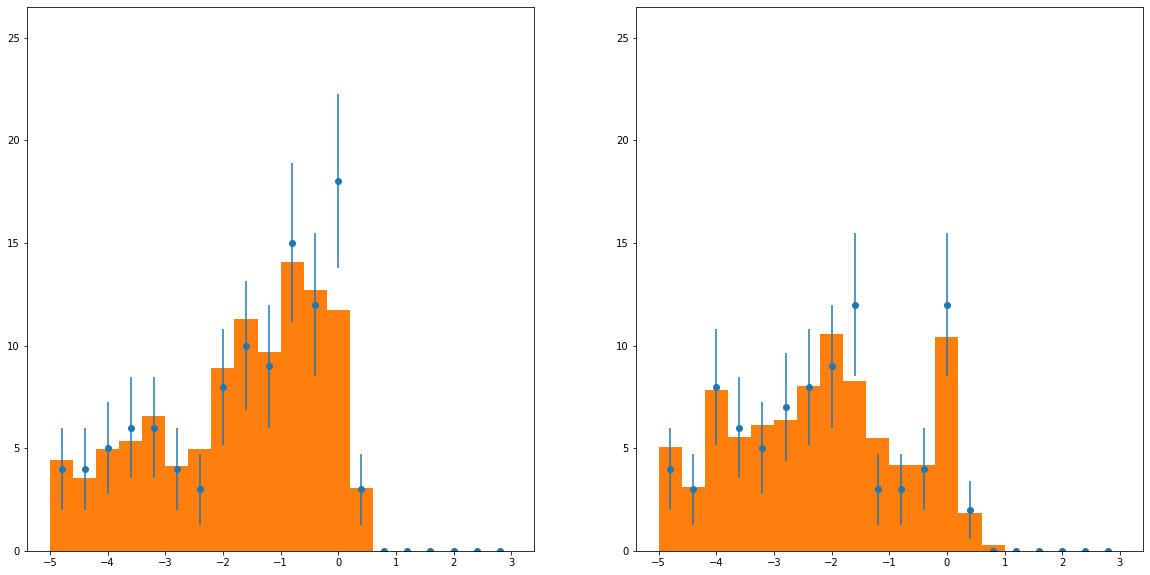

In [43]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

bins_ = 20
range_ = (-5.,3.)

#axes[0].hist( ( 1. - df_data[ "Xi" ][ msk1 ] / df_data[ "XiMuMuPlus" ][ msk1 ] ), bins=10, range=(-5.,3.), weights=weights_1 )
#axes[1].hist( ( 1. - df_data[ "Xi" ][ msk2 ] / df_data[ "XiMuMuMinus" ][ msk2 ] ), bins=10, range=(-5.,3.), weights=weights_2 )

vals_1 = ( 1. - df_data[ "Xi" ][ msk1_data ] / df_data[ "XiMuMuPlus" ][ msk1_data ] )
counts_1, bin_edges_1 = np.histogram( vals_1, bins=bins_, range=range_ )
errors_1 = np.sqrt( counts_1 )
print ( counts_1, bin_edges_1 )

bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
axes[0].errorbar(bin_centres_1, counts_1, yerr=errors_1, fmt='o')

vals_2 = ( 1. - df_data[ "Xi" ][ msk2_data ] / df_data[ "XiMuMuMinus" ][ msk2_data ] )
counts_2, bin_edges_2 = np.histogram( vals_2, bins=bins_, range=range_ )
errors_2 = np.sqrt( counts_2 )
print ( counts_2, bin_edges_2 )

bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
axes[1].errorbar(bin_centres_2, counts_2, yerr=errors_2, fmt='o')

idx_ymax_ = np.argmax( np.concatenate( [counts_1, counts_2] ) )
y_max = np.concatenate( [counts_1, counts_2] )[idx_ymax_] + 2*np.concatenate( [errors_1, errors_2] )[idx_ymax_]
print ( "y max. = {}".format(y_max) )

weights_1 = None
if resample_factor > 1:
    weights_1 = np.full_like( df_bkg[ "Xi" ][ msk1_bkg ], ( 1./resample_factor ) )

vals_bkg_1 = ( 1. - df_bkg[ "Xi" ][ msk1_bkg ] / df_bkg[ "XiMuMuPlus" ][ msk1_bkg ] )
axes[0].hist( vals_bkg_1, bins=bins_, range=range_, weights=weights_1 )
axes[0].set_ylim( top=y_max )

weights_2 = None
if resample_factor > 1:
    weights_2 = np.full_like( df_bkg[ "Xi" ][ msk2_bkg ], ( 1./resample_factor ) )
    
vals_bkg_2 = ( 1. - df_bkg[ "Xi" ][ msk2_bkg ] / df_bkg[ "XiMuMuMinus" ][ msk2_bkg ] )
axes[1].hist( vals_bkg_2, bins=bins_, range=range_, weights=weights_2 )
axes[1].set_ylim( top=y_max )

143173    159.089706
94008     243.554047
400677    435.501099
864306    424.508575
864307    424.508575
357720    173.787979
845555    129.415924
78164     180.677673
176186    198.506714
610431    203.783401
661265    172.200363
661266    172.200363
871127    128.325729
871128    128.325729
18691     291.895813
94709     111.045921
418169    141.614594
448750    123.655502
Name: InvMass, dtype: float32
498880    178.383163
506792    304.599335
324420    202.372726
324423    202.372726
449779    206.268372
605023    126.680962
852315    138.574188
787069    234.244064
796822    311.670593
94858     401.295471
209640    161.286362
791624    114.882095
Name: InvMass, dtype: float32
y max. = 17.6332495807108


(0.0, 17.6332495807108)

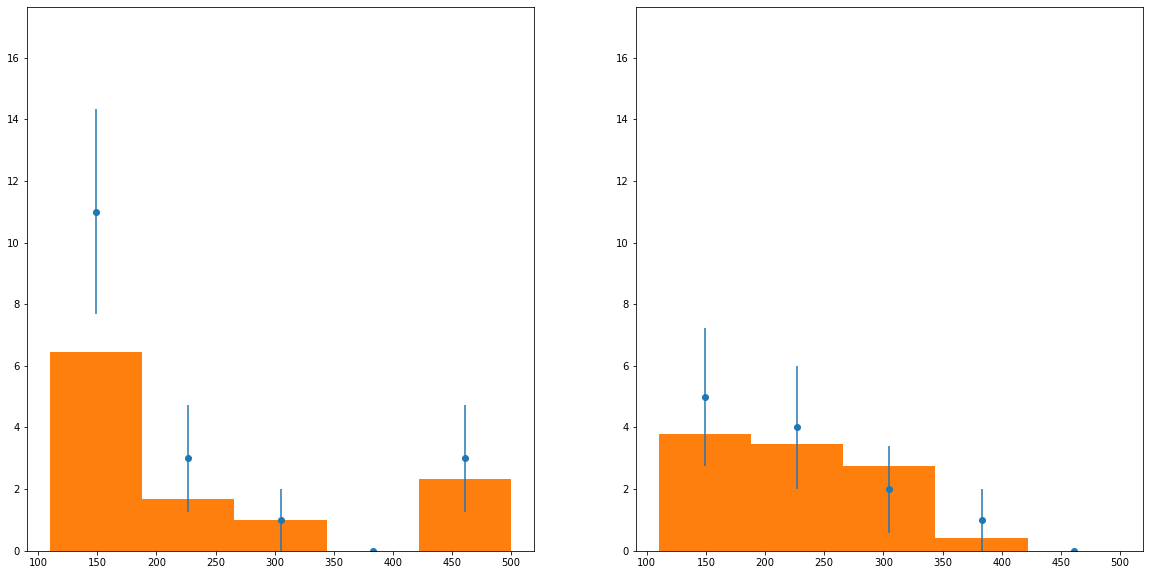

In [46]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

#var_ = "Xi"
#bins_ = 10
#range_ = (0.,0.2)

#var_ = "ThX"
#bins_ = 10
#range_ = (-0.0005,0.0005)

# var_ = "ThY"
# bins_ = 10
# range_ = (-0.0005,0.0005)

#var_ = "T"
#bins_ = 10
#range_ = (-4.,0.)

var_ = "InvMass"
bins_ = 5
range_ = (110.,500.)

msk1_data_sel = ( vals_1 >= -0.20 ) & ( vals_1 <= +0.20 )
print ( df_data[ var_ ][ msk1_data ][ msk1_data_sel ] )

counts_1, bin_edges_1 = np.histogram( df_data[ var_ ][ msk1_data ][ msk1_data_sel ], bins=bins_, range=range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
axes[0].errorbar(bin_centres_1, counts_1, yerr=errors_1, fmt='o')

msk2_data_sel = ( vals_2 >= -0.20 ) & ( vals_2 <= +0.20 )
print ( df_data[ var_ ][ msk2_data ][ msk2_data_sel ] )

counts_2, bin_edges_2 = np.histogram( df_data[ var_ ][ msk2_data ][ msk2_data_sel ], bins=bins_, range=range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
axes[1].errorbar(bin_centres_2, counts_2, yerr=errors_2, fmt='o')

idx_ymax_ = np.argmax( np.concatenate( [counts_1, counts_2] ) )
y_max = np.concatenate( [counts_1, counts_2] )[idx_ymax_] + 2*np.concatenate( [errors_1, errors_2] )[idx_ymax_]
print ( "y max. = {}".format(y_max) )

msk1_bkg_sel = ( vals_bkg_1 >= -0.20 ) & ( vals_bkg_1 <= +0.20 )
axes[0].hist( df_bkg[ var_ ][ msk1_bkg ][ msk1_bkg_sel ], bins=bins_, range=range_, weights=weights_1[ msk1_bkg_sel ] )
axes[0].set_ylim( top=y_max )

msk2_bkg_sel = ( vals_bkg_2 >= -0.20 ) & ( vals_bkg_2 <= +0.20 )
axes[1].hist( df_bkg[ var_ ][ msk2_bkg ][ msk2_bkg_sel ], bins=bins_, range=range_, weights=weights_2[ msk2_bkg_sel ] )
axes[1].set_ylim( top=y_max )